<a href="https://colab.research.google.com/github/Rerina/Artificial_intelligence_and_database_systems/blob/main/Another_copy_of_Hacaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyedflib import highlevel
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
!pip install pyEDFlib
import pyedflib as plib

In [ ]:
# from pyedflib import highlevel
# signals, signal_headers, header = highlevel.read_edf("/content/drive/MyDrive/Brain/Hachaton/Ati4x1_15m_BL_6h.edf")
# print(signals)
# print(signal_headers)
# print( header)

In [ ]:
# from pyedflib import highlevel
# signals_fl, signal_headers_fl, header_fl = highlevel.read_edf("/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_BL_6h_fully_marked.edf")
# print(signals_fl)
# print(signal_headers_fl)
# print( header_fl)

In [ ]:
# signal_headers_fl

Information from Kaggle https://www.kaggle.com/code/cdeotte/how-to-make-spectrogram-from-eeg/notebook

LL Spec = ( spec(Fp1 - F7) + spec(F7 - T3) + spec(T3 - T5) + spec(T5 - O1) )/4.


In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Brain/Hachaton/Ati4x1_15m_BL_6h.txt", sep="\t", index_col="NN")
# df

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# for i, (array, label_dict) in enumerate(zip(signals, signal_headers)):
#     plt.plot(array, label=label_dict['label'])

# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Data Visualization of Arrays with Labels')
# plt.legend()
# plt.show()

# Find all files to work with

In [ ]:
import os

# Define the directory to search in (default is the current directory)
search_directory = "/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train"  # Change this path if your files are in a different directory

# Find all files with .edf extension
edf_files = []
edf_files_marked = []
for root, dirs, files in os.walk(search_directory):
    for file in files:
        if file.endswith(".edf"):
            full_path = os.path.join(root, file)
            edf_files.append(full_path)
if edf_files:
    print("Found .edf files:")
    for i, edf_file in enumerate(edf_files, 1):
        #print(f"{i}. {edf_file}")
        if (("fully_marked." in edf_file and not "Pharm" in edf_file) or ("golden" in edf_file))and not "Ati4y3_12m_BL_6h_edited" in edf_file:
          edf_files_marked.append(edf_file)
    for i, edf_file in enumerate(edf_files_marked, 1):
      print(f"{i}. {edf_file}")
else:
    print("No .edf files found.")



Found .edf files:
1. /content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_H2O_6h_fully_marked.edf
2. /content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x6_14m_BL_6h_fully_marked.edf
3. /content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x3_12m_BL_6h_fully_marked.edf
4. /content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_BL_6h_fully_marked.edf
5. /content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_golden_standard_[15 files, 6 h each]/Ati4x1_15m_BL_6h_edited.edf
6. /content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_golden_standard_[15 files, 6 h each]/Ati5x3_14m_BL_6h_edited.edf
7. /content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_golden_standard_[15 files, 6 h each]/Ati4y4_12m_BL

In [ ]:
swd = []
ds = []
iss = []
empty = []

for i, edf_file in enumerate(edf_files_marked, 1):

  signals, signal_headers, header = highlevel.read_edf(edf_file)
  # print(signals)
  # print(signal_headers)
  # print( header)
  annotations = header['annotations']
  # print(header['annotations'][0:4])
  annotations_dicts = []

  prev_end_time = None
  # print(header['annotations'][0:4])
  # print(len(annotations))
  # Process annotations in pairs
  print(edf_file)

  for j in range(0, len(annotations), 2):
      start_time, _, start_label = annotations[j]
      end_time, _, end_label = annotations[j + 1]
      if end_time-start_time>1.5 and "golden_standard" in edf_file:

        # Determine the type by removing digits from the label (e.g., 'ds1' -> 'ds')
        annotation_type = ''.join(filter(str.isalpha, start_label))

        # Create a dictionary for the current annotation
        annotations_dicts.append({
            'start': start_time,
            'end': end_time,
            'type': annotation_type
        })
        episode = {"FrL":signals[0][int(start_time*400):int(end_time*400)+1],
                "FrR":signals[1][int(start_time*400):int(end_time*400)+1],
                "OcR":signals[2][int(start_time*400):int(end_time*400)+1],
                }
        if annotation_type == 'is':
          iss.append(episode.copy())
        elif annotation_type == 'ds':
          ds.append(episode.copy())
        else:
          swd.append(episode.copy())
          print(f"{int(start_time*400)}:{int(end_time*400)}")

      else:
        pass
        #print(start_time, start_label, end_time, end_label)


      if prev_end_time and "fully_marked." in edf_file:
          empty.append({
                "FrL":signals[0][int(prev_end_time*400):int(start_time*400)+1],
                "FrR":signals[1][int(prev_end_time*400):int(start_time*400)+1],
                "OcR":signals[2][int(prev_end_time*400):int(start_time*400)+1],
                })
      prev_end_time = end_time
  # print(annotations_dicts)

/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_H2O_6h_fully_marked.edf
/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x6_14m_BL_6h_fully_marked.edf
/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x3_12m_BL_6h_fully_marked.edf
/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_BL_6h_fully_marked.edf
/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_golden_standard_[15 files, 6 h each]/Ati4x1_15m_BL_6h_edited.edf
/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_golden_standard_[15 files, 6 h each]/Ati5x3_14m_BL_6h_edited.edf
943940:945260
970340:971520
972120:973670
974690:975579
976210:979640
1151250:1153450
/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_gol

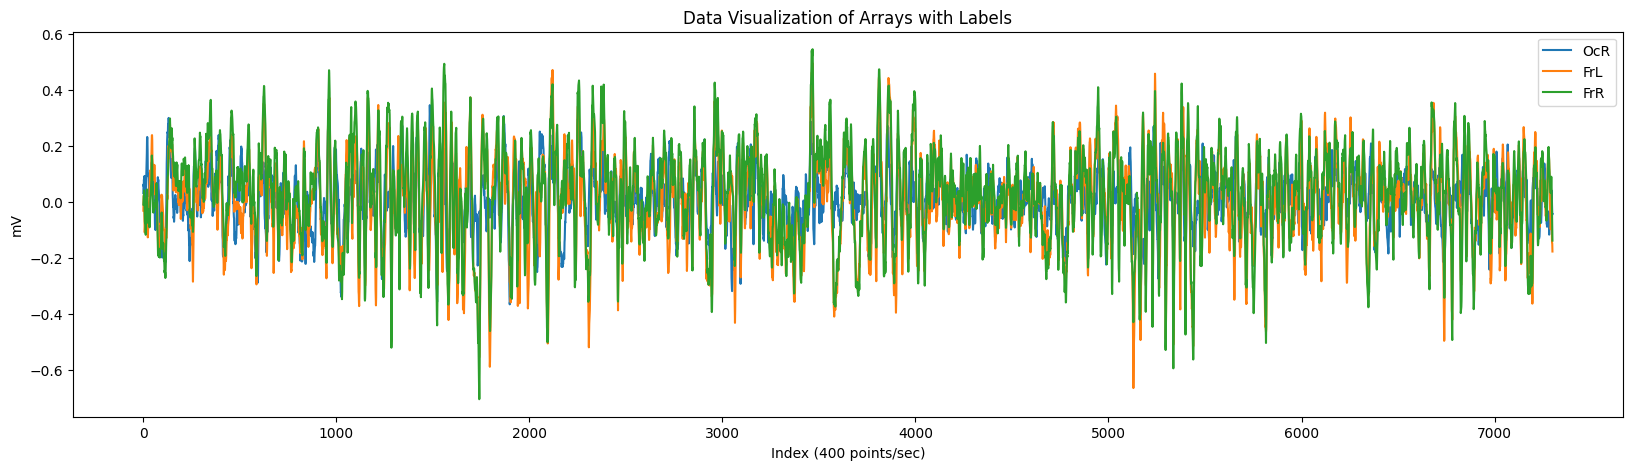

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(iss[0]["OcR"], label="OcR")
plt.plot(iss[0]["FrL"], label="FrL")
plt.plot(iss[0]["FrR"], label="FrR")

plt.xlabel('Index (400 points/sec)')
plt.ylabel('mV')
plt.title('Data Visualization of Arrays with Labels')
plt.legend()
plt.show()

In [ ]:
def info(episodes):
  frl_lengths = [len(episode["FrL"]) for episode in episodes]

# Calculate max, min, and average lengths
  max_len = max(frl_lengths)/400
  min_len = min(frl_lengths)/400
  avg_len = np.mean(frl_lengths)/400

  # Output the results
  print(f"Max length: {max_len:.1f}")
  print(f"Min length: {min_len:.1f}")
  print(f"Average length: {avg_len:.1f}")

In [ ]:
import numpy as np
print(f"Is: {len(iss)}")
info(iss)
print(f"Ds: {len(ds)}")
info(ds)
print(f"Swd: {len(swd)}")
info(swd)
print(f"Empty: {len(empty)}")
info(empty)

Is: 11
Max length: 34.6
Min length: 10.5
Average length: 20.5
Ds: 55
Max length: 334.3
Min length: 15.6
Average length: 60.5
Swd: 102
Max length: 29.2
Min length: 1.8
Average length: 7.0
Empty: 336
Max length: 2981.0
Min length: 0.0
Average length: 159.7


## Обучение на том, что есть

In [ ]:
def cut_array(array, target_length=1200):
    """
    Cuts or pads the given array to the target length.
    If the array is longer than the target length, it is truncated.
    If the array is shorter, it is padded with zeros (or truncated).

    Parameters:
    - array: The array to be cut or padded.
    - target_length: The desired length of the array (default is 1200).

    Returns:
    - A new array of the target length.
    """
    # If the array is longer than the target length, truncate it
    if len(array) > target_length:
        return array[:target_length]
    # If the array is shorter than the target length, pad it with zeros
    elif len(array) < target_length:
        padding = np.zeros(target_length - len(array))  # Create padding of zeros
        return np.concatenate([array, padding])  # Append padding to the end
    # If the array is already the target length, return it as is
    else:
        return array


In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming these are your four arrays (each containing episodes as dictionaries with arrays "FrR", "FrL", "OcR")
classes = {
    'is': iss,  # List of episodes for class "is"
    'ds': ds,  # List of episodes for class "ds"
    'swd': swd,  # List of episodes for class "swd"
    'empty': empty  # List of episodes for class "empty"
}

# Filter episodes where the length of "FrL" array is between 400 and 16000
filtered_episodes = {}
for class_name, episodes in classes.items():
    filtered_episodes[class_name] = [
        episode for episode in episodes if 1200 < len(episode["FrL"]) < 328000
    ]

# Randomly select 50 episodes from each class
selected_episodes = []
labels = []

for class_name, episodes in filtered_episodes.items():
    selected = random.sample(episodes, 50)  # Select 50 random episodes from each class
    selected_episodes.extend(selected)
    labels.extend([class_name] * 50)

# Prepare features (stack "FrR", "FrL", "OcR" arrays into a single feature vector)
X = []
for episode in selected_episodes:
    # Cut the arrays to 1200 elements
    fr_r = cut_array(episode["FrR"], target_length=1200)
    fr_l = cut_array(episode["FrL"], target_length=1200)
    oc_r = cut_array(episode["OcR"], target_length=1200)

    # Stack the arrays "FrR", "FrL", "OcR" into a single feature vector
    feature_vector = np.concatenate([fr_r, fr_l, oc_r])
    X.append(feature_vector)

# Convert to numpy arrays
X = np.array(X)
y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest classifier in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4750


In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to pad or truncate the arrays
def pad_or_truncate(array, target_length=327000):
    if len(array) > target_length:
        return array[:target_length]  # Truncate if longer than target length
    elif len(array) < target_length:
        return np.pad(array, (0, target_length - len(array)), mode='constant')  # Pad if shorter than target length
    else:
        return array  # No change if the array is already the target length

# Assuming these are your four arrays (each containing episodes as dictionaries with arrays "FrR", "FrL", "OcR")
classes = {
    'is': iss,  # List of episodes for class "is"
    'ds': ds,  # List of episodes for class "ds"
    'swd': swd,  # List of episodes for class "swd"
    'empty': empty  # List of episodes for class "empty"
}

# Filter episodes where the length of "FrL" array is between 400 and 16000
filtered_episodes = {}
for class_name, episodes in classes.items():
    filtered_episodes[class_name] = [
        episode for episode in episodes if 400 < len(episode["FrL"]) < 327000
    ]

# Randomly select 50 episodes from each class
selected_episodes = []
labels = []

for class_name, episodes in filtered_episodes.items():
    selected = random.sample(episodes, 50)  # Select 50 random episodes from each class
    selected_episodes.extend(selected)
    labels.extend([class_name] * 50)

# Prepare features (stack "FrR", "FrL", "OcR" arrays into a single feature vector)
X = []
for episode in selected_episodes:
    # Pad or truncate each array to the target length
    fr_r = pad_or_truncate(episode["FrR"])
    fr_l = pad_or_truncate(episode["FrL"])
    oc_r = pad_or_truncate(episode["OcR"])

    # Stack the arrays "FrR", "FrL", "OcR" into a single feature vector
    feature_vector = np.concatenate([fr_r, fr_l, oc_r])
    X.append(feature_vector)

# Convert to numpy arrays
X = np.array(X)
y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest classifier in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5000


In [ ]:
!pip install lazypredict

In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Function to cut arrays to a fixed length (1200 elements)
def cut_array(array, target_length=1200):
    """
    Cuts or pads the given array to the target length.
    If the array is longer than the target length, it is truncated.
    If the array is shorter, it is padded with zeros.

    Parameters:
    - array: The array to be cut or padded.
    - target_length: The desired length of the array (default is 1200).

    Returns:
    - A new array of the target length.
    """
    # If the array is longer than the target length, truncate it
    if len(array) > target_length:
        return array[:target_length]
    # If the array is shorter than the target length, pad it with zeros
    elif len(array) < target_length:
        padding = np.zeros(target_length - len(array))  # Create padding of zeros
        return np.concatenate([array, padding])  # Append padding to the end
    # If the array is already the target length, return it as is
    else:
        return array

# Assuming these are your four arrays (each containing episodes as dictionaries with arrays "FrR", "FrL", "OcR")
classes = {
    'is': iss,  # List of episodes for class "is"
    'ds': ds,  # List of episodes for class "ds"
    'swd': swd,  # List of episodes for class "swd"
    'empty': empty  # List of episodes for class "empty"
}

# Filter episodes where the length of "FrL" array is between 1000 and 328000
filtered_episodes = {}
for class_name, episodes in classes.items():
    filtered_episodes[class_name] = [
        episode for episode in episodes if 1000 < len(episode["FrL"]) < 328000
    ]

# Randomly select 50 episodes from each class
selected_episodes = []
labels = []

for class_name, episodes in filtered_episodes.items():
    selected = random.sample(episodes, 50)  # Select 50 random episodes from each class
    selected_episodes.extend(selected)
    labels.extend([class_name] * 50)

# Prepare features (cut "FrR", "FrL", "OcR" arrays to 1200 elements and stack them into a single feature vector)
X = []
for episode in selected_episodes:
    # Cut the arrays to 1200 elements
    fr_r = cut_array(episode["FrR"], target_length=1200)
    fr_l = cut_array(episode["FrL"], target_length=1200)
    oc_r = cut_array(episode["OcR"], target_length=1200)

    # Stack the arrays "FrR", "FrL", "OcR" into a single feature vector
    feature_vector = np.concatenate([fr_r, fr_l, oc_r])
    X.append(feature_vector)

# Convert to numpy arrays
X = np.array(X)
y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

# Fit and evaluate the models using LazyPredict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


 87%|████████▋ | 27/31 [00:17<00:01,  3.60it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197175
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3600
[LightGBM] [Info] Start training from score -1.519826
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.290984
[LightGBM] [Info] Start training from score -1.361602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

100%|██████████| 31/31 [00:28<00:00,  1.11it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.45               0.49    None      0.39   
GaussianNB                         0.50               0.49    None      0.49   
ExtraTreesClassifier               0.42               0.48    None      0.33   
SVC                                0.38               0.41    None      0.29   
LGBMClassifier                     0.35               0.41    None      0.33   
NuSVC                              0.38               0.38    None      0.32   
LinearDiscriminantAnalysis         0.35               0.38    None      0.34   
AdaBoostClassifier                 0.38               0.38    None      0.36   
BernoulliNB                        0.30           

In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Function to cut arrays to a fixed length (1200 elements)
def cut_array(array, target_length=1200):
    """
    Cuts or pads the given array to the target length.
    If the array is longer than the target length, it is truncated.
    If the array is shorter, it is padded with zeros.

    Parameters:
    - array: The array to be cut or padded.
    - target_length: The desired length of the array (default is 1200).

    Returns:
    - A new array of the target length.
    """
    # If the array is longer than the target length, truncate it
    if len(array) > target_length:
        return array[:target_length]
    # If the array is shorter than the target length, pad it with zeros
    elif len(array) < target_length:
        padding = np.zeros(target_length - len(array))  # Create padding of zeros
        return np.concatenate([array, padding])  # Append padding to the end
    # If the array is already the target length, return it as is
    else:
        return array

# Assuming these are your four arrays (each containing episodes as dictionaries with arrays "FrR", "FrL", "OcR")
classes = {
    'is': iss,  # List of episodes for class "is"
    'ds': ds,  # List of episodes for class "ds"
    'swd': swd,  # List of episodes for class "swd"
    'empty': empty  # List of episodes for class "empty"
}

# Filter episodes where the length of "FrL" array is between 1000 and 328000
filtered_episodes = {}
for class_name, episodes in classes.items():
    filtered_episodes[class_name] = [
        episode for episode in episodes if 1000 < len(episode["FrL"]) < 328000
    ]

# Randomly select 50 episodes from each class
selected_episodes = []
labels = []

for class_name, episodes in filtered_episodes.items():
    selected = random.sample(episodes, 50)  # Select 50 random episodes from each class
    selected_episodes.extend(selected)
    labels.extend([class_name] * 50)

# Prepare features (cut "FrR", "FrL", "OcR" arrays to 1200 elements and stack them into a single feature vector)
X = []
for episode in selected_episodes:
    # Cut the arrays to 1200 elements
    fr_r = cut_array(episode["FrR"], target_length=1200)
    fr_l = cut_array(episode["FrL"], target_length=1200)
    oc_r = cut_array(episode["OcR"], target_length=1200)

    # Stack the arrays "FrR", "FrL", "OcR" into a single feature vector
    feature_vector = np.concatenate([fr_r, fr_l, oc_r])
    X.append(feature_vector)

# Convert to numpy arrays
X = np.array(X)

# Encode the labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4250


In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Function to cut arrays to a fixed length (1200 elements)
def cut_array(array, target_length=1200):
    """
    Cuts or pads the given array to the target length.
    If the array is longer than the target length, it is truncated.
    If the array is shorter, it is padded with zeros.

    Parameters:
    - array: The array to be cut or padded.
    - target_length: The desired length of the array (default is 1200).

    Returns:
    - A new array of the target length.
    """
    # If the array is longer than the target length, truncate it
    if len(array) > target_length:
        return array[:target_length]
    # If the array is shorter than the target length, pad it with zeros
    elif len(array) < target_length:
        padding = np.zeros(target_length - len(array))  # Create padding of zeros
        return np.concatenate([array, padding])  # Append padding to the end
    # If the array is already the target length, return it as is
    else:
        return array

# Assuming these are your four arrays (each containing episodes as dictionaries with arrays "FrR", "FrL", "OcR")
classes = {
    'is': iss,  # List of episodes for class "is"
    'ds': ds,  # List of episodes for class "ds"
    'swd': swd,  # List of episodes for class "swd"
    'empty': empty  # List of episodes for class "empty"
}

# Filter episodes where the length of "FrL" array is between 1000 and 328000
filtered_episodes = {}
for class_name, episodes in classes.items():
    filtered_episodes[class_name] = [
        episode for episode in episodes if 1000 < len(episode["FrL"]) < 328000
    ]

# Randomly select 50 episodes from each class
selected_episodes = []
labels = []

for class_name, episodes in filtered_episodes.items():
    selected = random.sample(episodes, 50)  # Select 50 random episodes from each class
    selected_episodes.extend(selected)
    labels.extend([class_name] * 50)

# Prepare features (cut "FrR", "FrL", "OcR" arrays to 1200 elements and stack them into a single feature vector)
X = []
for episode in selected_episodes:
    # Cut the arrays to 1200 elements
    fr_r = cut_array(episode["FrR"], target_length=1200)
    fr_l = cut_array(episode["FrL"], target_length=1200)
    oc_r = cut_array(episode["OcR"], target_length=1200)

    # Stack the arrays "FrR", "FrL", "OcR" into a single feature vector
    feature_vector = np.concatenate([fr_r, fr_l, oc_r])
    X.append(feature_vector)

# Convert to numpy arrays
X = np.array(X)

# Encode the labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
model = XGBClassifier(
    tree_method="hist",
    enable_categorical=True,
    use_label_encoder=False,
    max_depth=16,
    learning_rate=0.03,
    n_estimators=300,
    verbosity=0,
    silent=None,
    objective='multi:softmax',
    num_class=3,
    gamma=0.2,
    max_delta_step=2,
    subsample=0.7,
    reg_alpha=3,
    reg_lambda=0,
    n_jobs=-1,
    seed=23)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.4750


## Only FrR information

In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Function to cut arrays to a fixed length (1200 elements)
def cut_array(array, target_length=1200):
    """
    Cuts or pads the given array to the target length.
    If the array is longer than the target length, it is truncated.
    If the array is shorter, it is padded with zeros.

    Parameters:
    - array: The array to be cut or padded.
    - target_length: The desired length of the array (default is 1200).

    Returns:
    - A new array of the target length.
    """
    # If the array is longer than the target length, truncate it
    if len(array) > target_length:
        return array[:target_length]
    # If the array is shorter than the target length, pad it with zeros
    elif len(array) < target_length:
        padding = np.zeros(target_length - len(array))  # Create padding of zeros
        return np.concatenate([array, padding])  # Append padding to the end
    # If the array is already the target length, return it as is
    else:
        return array

# Assuming these are your four arrays (each containing episodes as dictionaries with arrays "FrR", "FrL", "OcR")
classes = {
    'is': iss,  # List of episodes for class "is"
    'ds': ds,  # List of episodes for class "ds"
    'swd': swd,  # List of episodes for class "swd"
    'empty': empty  # List of episodes for class "empty"
}

# Filter episodes where the length of "FrL" array is between 1000 and 328000
filtered_episodes = {}
for class_name, episodes in classes.items():
    filtered_episodes[class_name] = [
        episode for episode in episodes if 1000 < len(episode["FrL"]) < 328000
    ]

# Randomly select 50 episodes from each class
selected_episodes = []
labels = []

for class_name, episodes in filtered_episodes.items():
    selected = random.sample(episodes, 50)  # Select 50 random episodes from each class
    selected_episodes.extend(selected)
    labels.extend([class_name] * 50)

# Prepare features (cut only the "FrR" arrays to 1200 elements)
X = []
for episode in selected_episodes:
    # Cut the "FrR" array to 1200 elements
    fr_r = cut_array(episode["FrR"], target_length=1200)

    # Use only "FrR" as the feature vector
    X.append(fr_r)

# Convert to numpy arrays
X = np.array(X)

# Encode the labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.2750


## Игра с данными


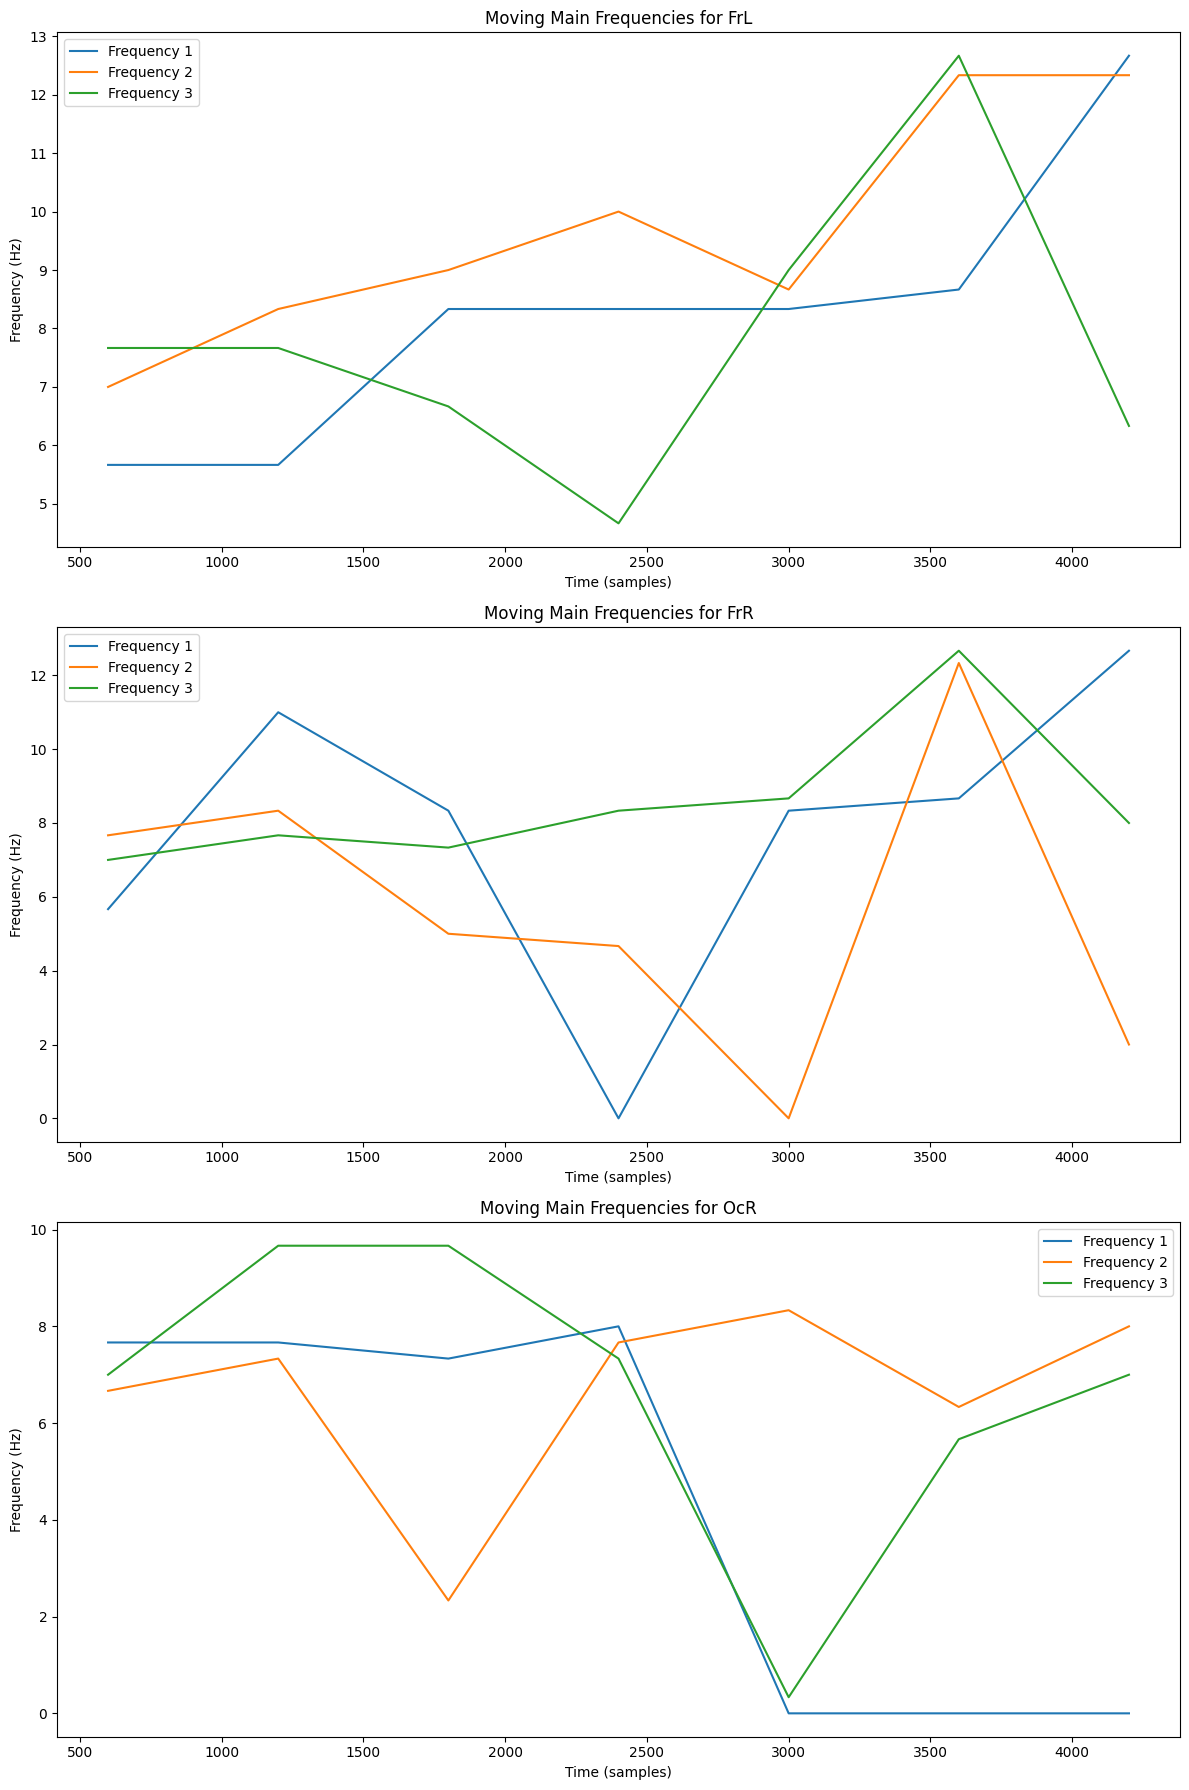

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list containing up to 3 main frequencies per window.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]

        # Store the main frequencies and corresponding time point
        main_frequencies.append(top_frequencies)
        time_points.append(start + window_size / 2)

    return main_frequencies, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 600  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": iss[1]["FrL"],
    "FrR": iss[1]["FrR"],
    "OcR": iss[1]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies
    main_frequencies, time_points = find_main_frequencies(data, window_size, overlap, sample_rate)

    # Plot main frequencies
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        axs[i].plot(time_points, freqs, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list containing up to 3 main frequencies per window.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]

        # Store the main frequencies and corresponding time point
        main_frequencies.append(top_frequencies)
        time_points.append(start + window_size / 2)

    return main_frequencies, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 600  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": iss[0]["FrL"],
    "FrR": iss[0]["FrR"],
    "OcR": iss[0]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies
    main_frequencies, time_points = find_main_frequencies(data, window_size, overlap, sample_rate)

    # Plot main frequencies
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        axs[i].plot(time_points, freqs, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()

plt.tight_layout()
plt.show()


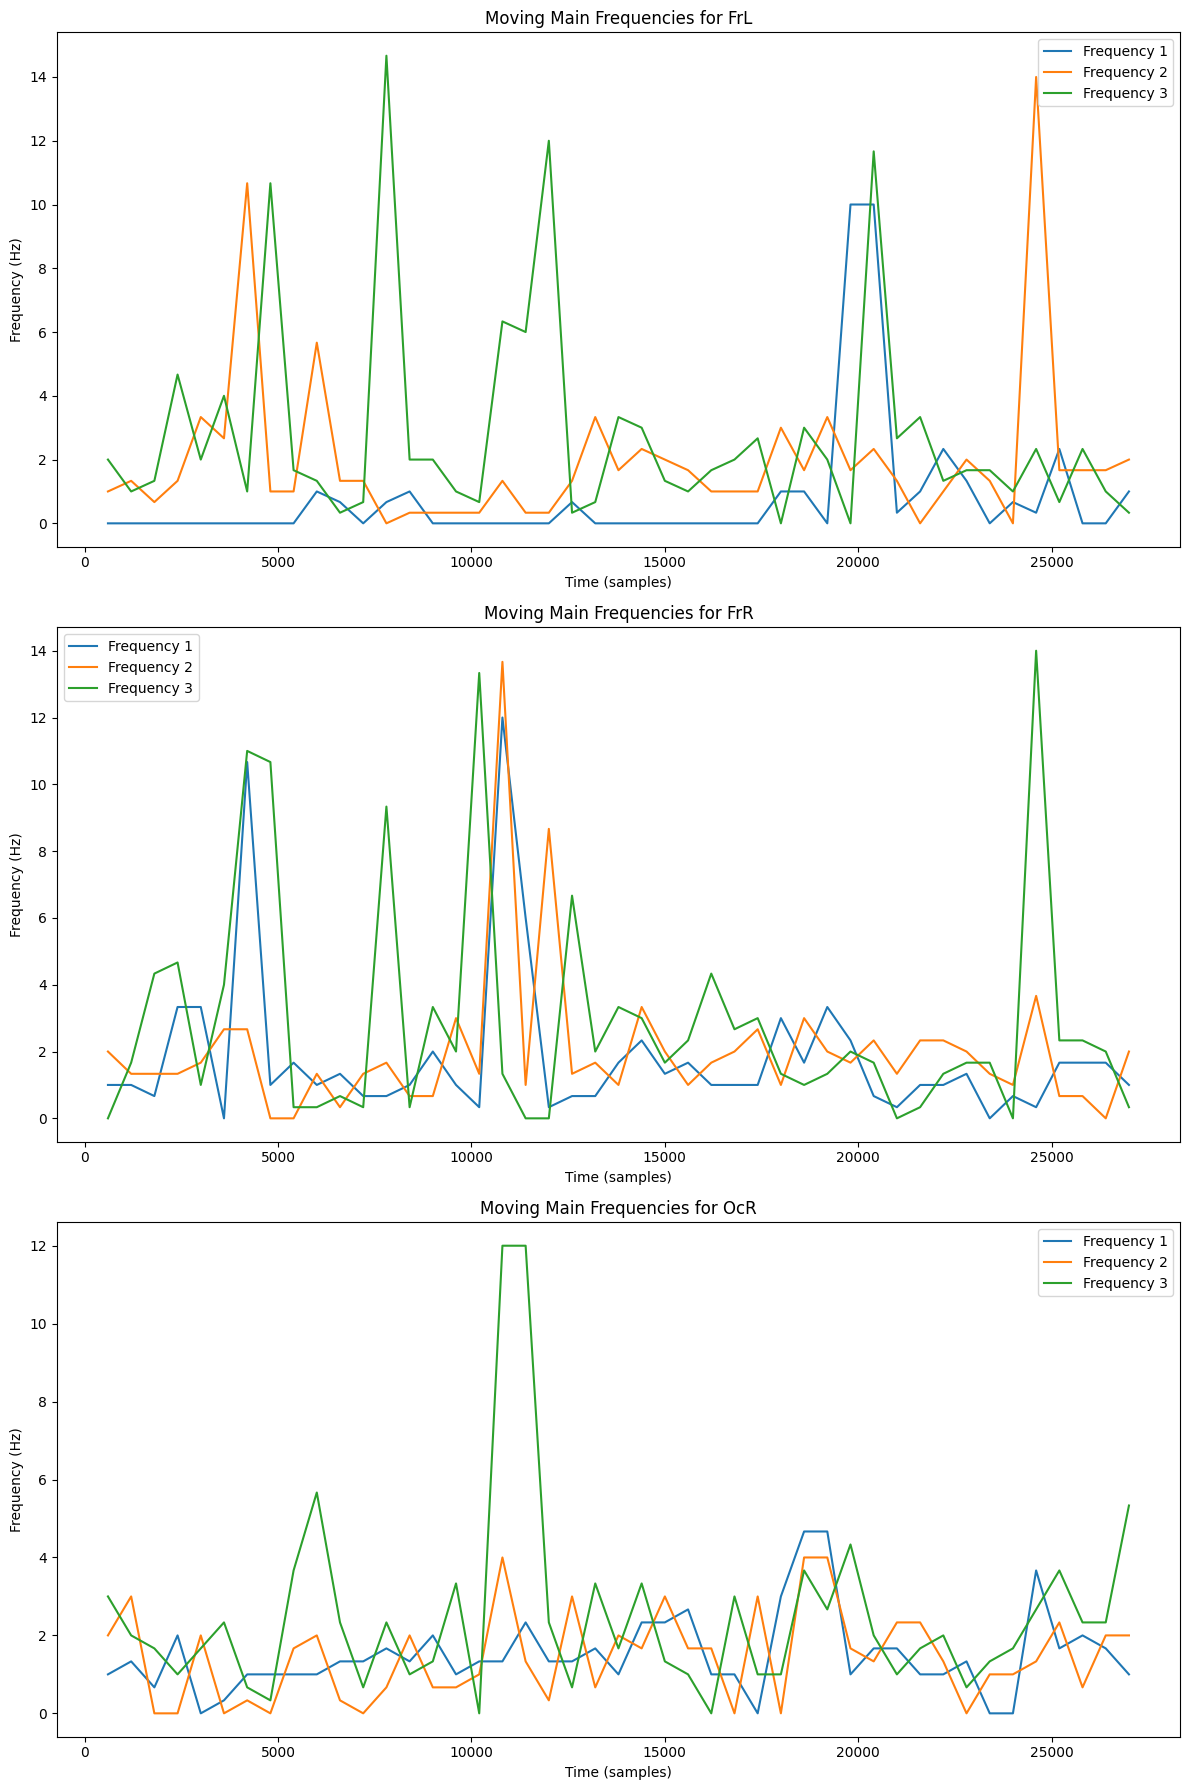

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list containing up to 3 main frequencies per window.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]

        # Store the main frequencies and corresponding time point
        main_frequencies.append(top_frequencies)
        time_points.append(start + window_size / 2)

    return main_frequencies, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 600  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": iss[0]["FrL"],
    "FrR": iss[0]["FrR"],
    "OcR": iss[0]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies
    main_frequencies, time_points = find_main_frequencies(data, window_size, overlap, sample_rate)

    # Plot main frequencies
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        axs[i].plot(time_points, freqs, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()

plt.tight_layout()
plt.show()


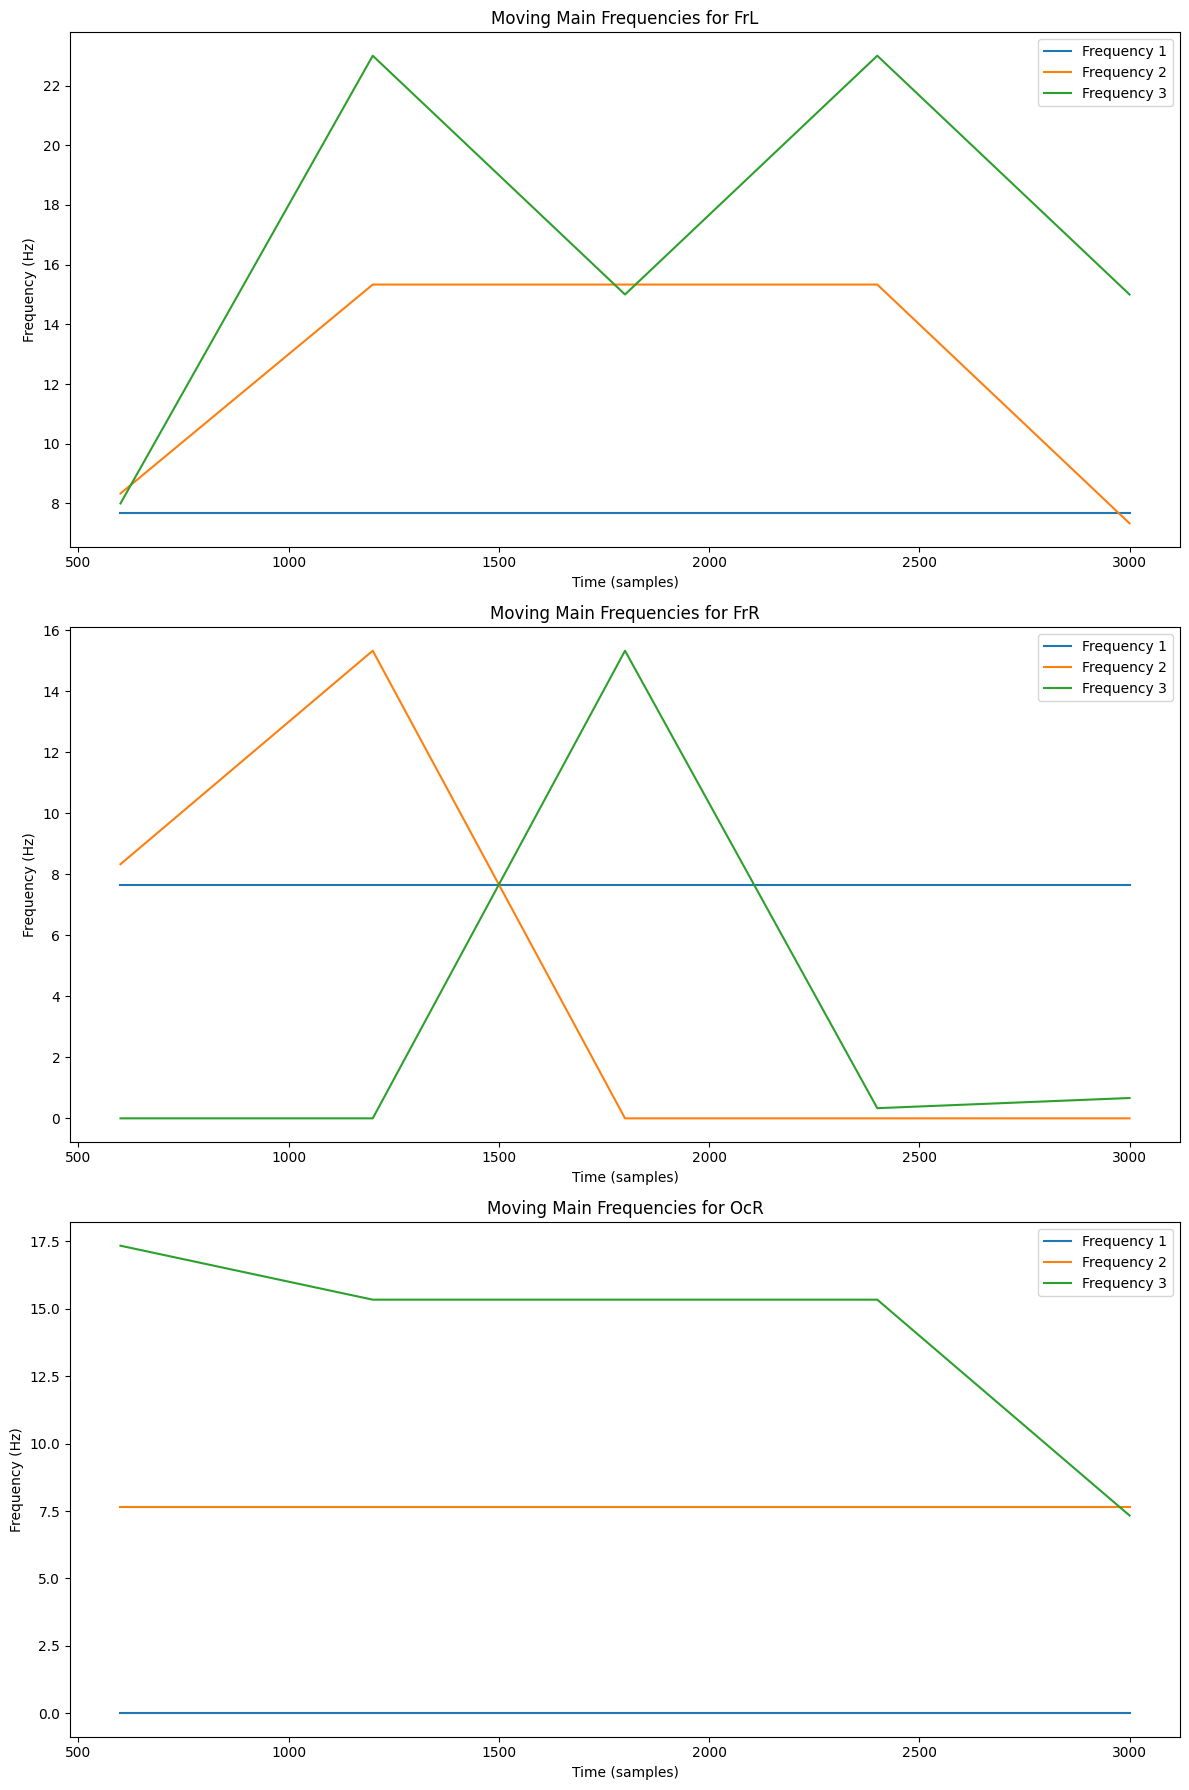

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list containing up to 3 main frequencies per window.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]

        # Store the main frequencies and corresponding time point
        main_frequencies.append(top_frequencies)
        time_points.append(start + window_size / 2)

    return main_frequencies, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 600  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": swd[1]["FrL"],
    "FrR": swd[1]["FrR"],
    "OcR": swd[1]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies
    main_frequencies, time_points = find_main_frequencies(data, window_size, overlap, sample_rate)

    # Plot main frequencies
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        axs[i].plot(time_points, freqs, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()

plt.tight_layout()
plt.show()


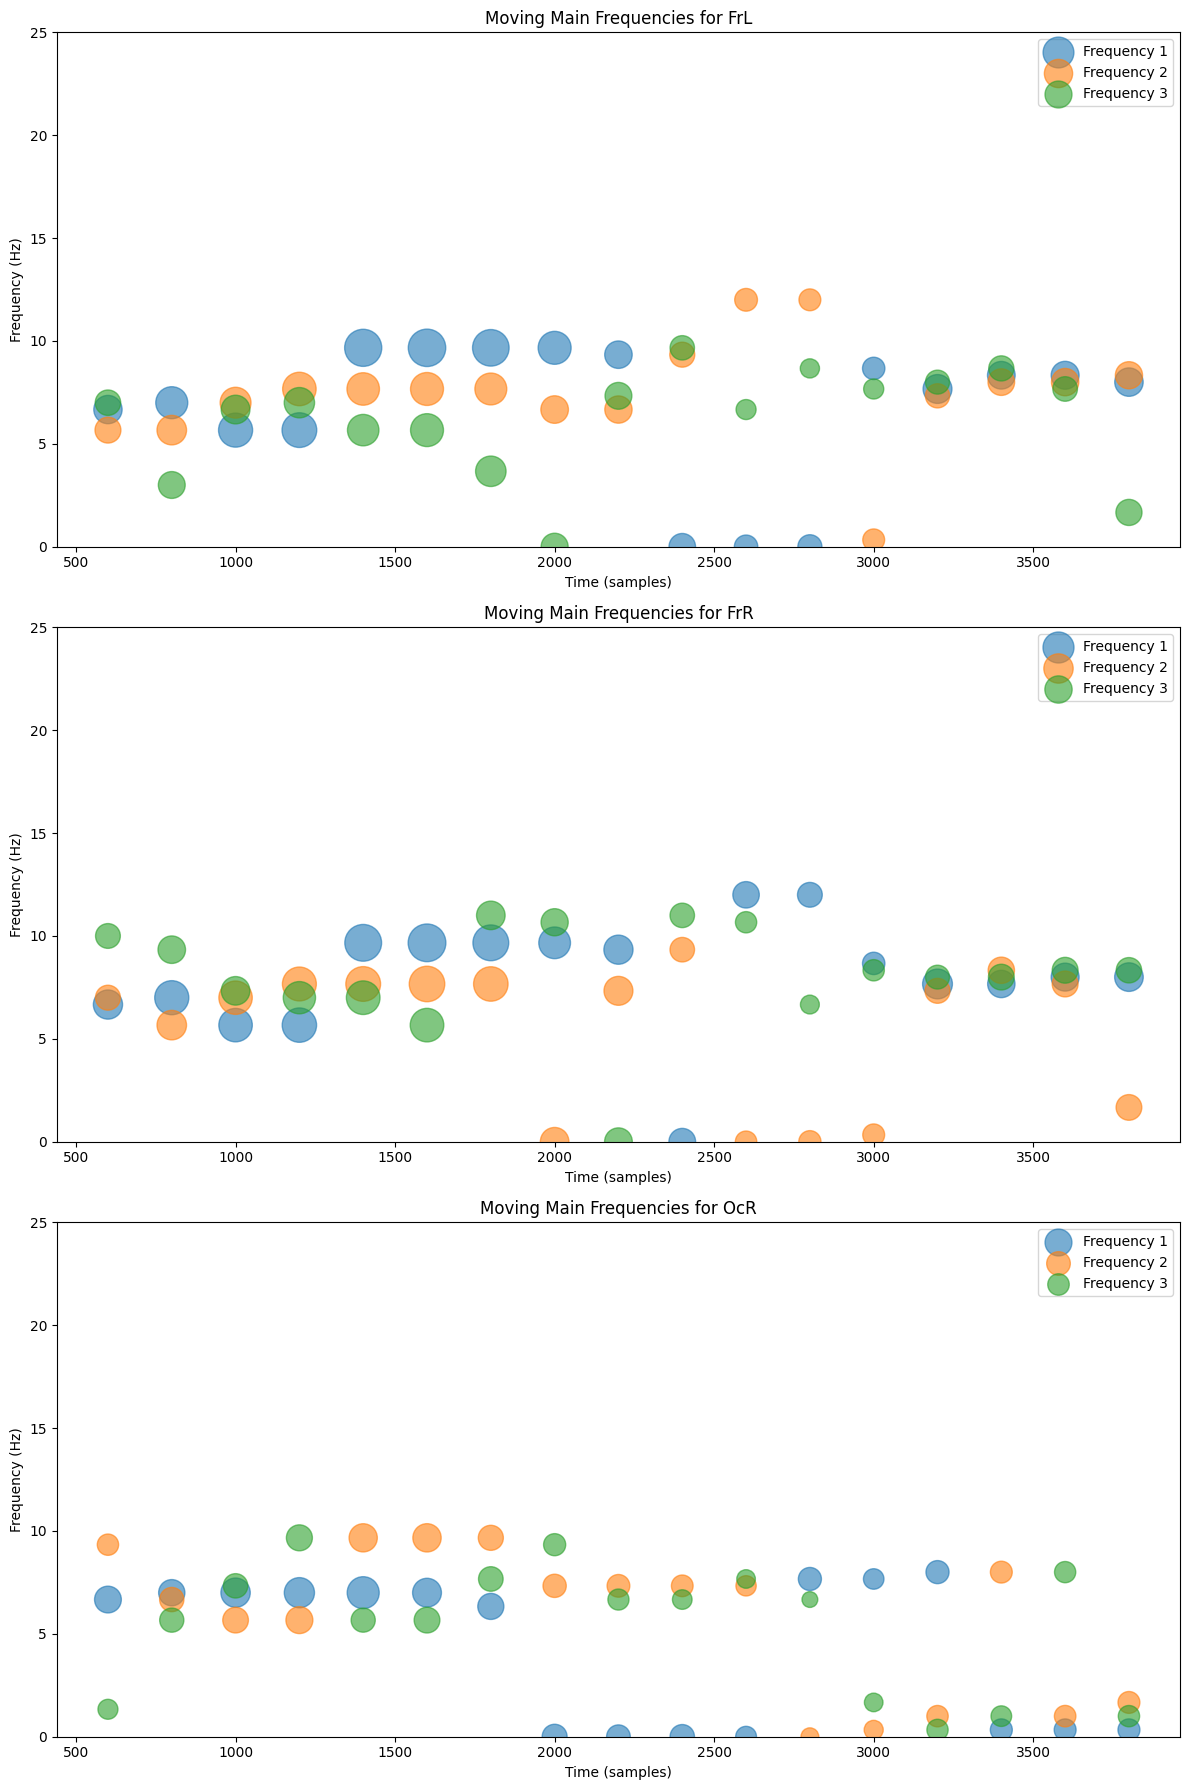

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies_and_amplitudes(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies and their amplitudes over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list of lists with up to 3 main frequencies per window.
    - main_amplitudes: A list of lists with amplitudes of these main frequencies.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    main_amplitudes = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        # Store the main frequencies, amplitudes, and time point
        main_frequencies.append(top_frequencies)
        main_amplitudes.append(top_amplitudes)
        time_points.append(start + window_size / 2)

    return main_frequencies, main_amplitudes, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 1000  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": iss[0]["FrL"],
    "FrR": iss[0]["FrR"],
    "OcR": iss[0]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies and amplitudes
    main_frequencies, main_amplitudes, time_points = find_main_frequencies_and_amplitudes(data, window_size, overlap, sample_rate)

    # Plot main frequencies with amplitude-dependent point sizes
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        amps = [amps[j] if j < len(amps) else 0 for amps in main_amplitudes]  # Use amplitude as point size

        # Scale amplitudes for display purposes (adjust scaling factor as needed)
        scaled_amps = np.array(amps) * 10

        # Scatter plot with frequency as y, time as x, and amplitude as size
        axs[i].scatter(time_points, freqs, s=scaled_amps, alpha=0.6, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()
    axs[i].set_ylim([0, 25])
plt.tight_layout()
plt.show()


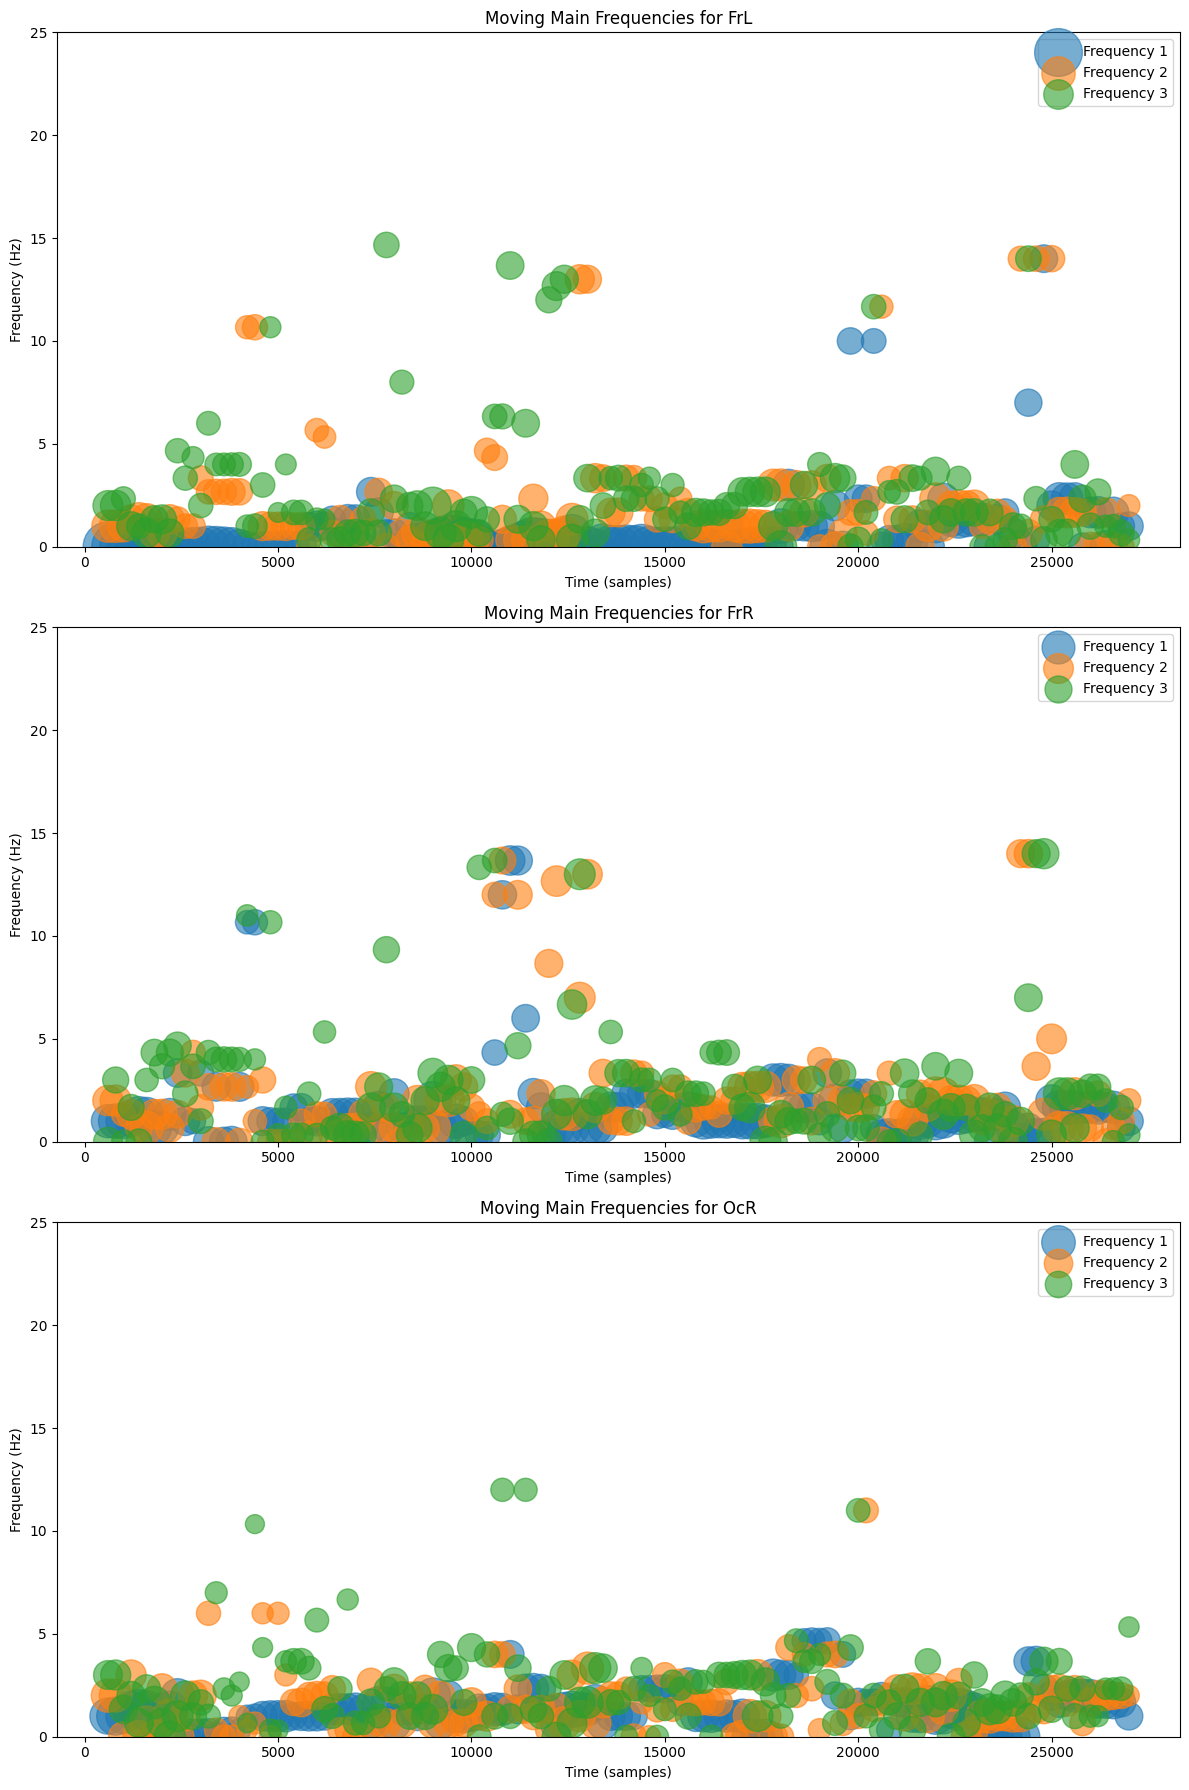

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies_and_amplitudes(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies and their amplitudes over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list of lists with up to 3 main frequencies per window.
    - main_amplitudes: A list of lists with amplitudes of these main frequencies.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    main_amplitudes = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        # Store the main frequencies, amplitudes, and time point
        main_frequencies.append(top_frequencies)
        main_amplitudes.append(top_amplitudes)
        time_points.append(start + window_size / 2)

    return main_frequencies, main_amplitudes, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 1000  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": ds[0]["FrL"],
    "FrR": ds[0]["FrR"],
    "OcR": ds[0]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies and amplitudes
    main_frequencies, main_amplitudes, time_points = find_main_frequencies_and_amplitudes(data, window_size, overlap, sample_rate)

    # Plot main frequencies with amplitude-dependent point sizes
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        amps = [amps[j] if j < len(amps) else 0 for amps in main_amplitudes]  # Use amplitude as point size

        # Scale amplitudes for display purposes (adjust scaling factor as needed)
        scaled_amps = np.array(amps) * 10

        # Scatter plot with frequency as y, time as x, and amplitude as size
        axs[i].scatter(time_points, freqs, s=scaled_amps, alpha=0.6, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()
    axs[i].set_ylim([0, 25])
plt.tight_layout()
plt.show()


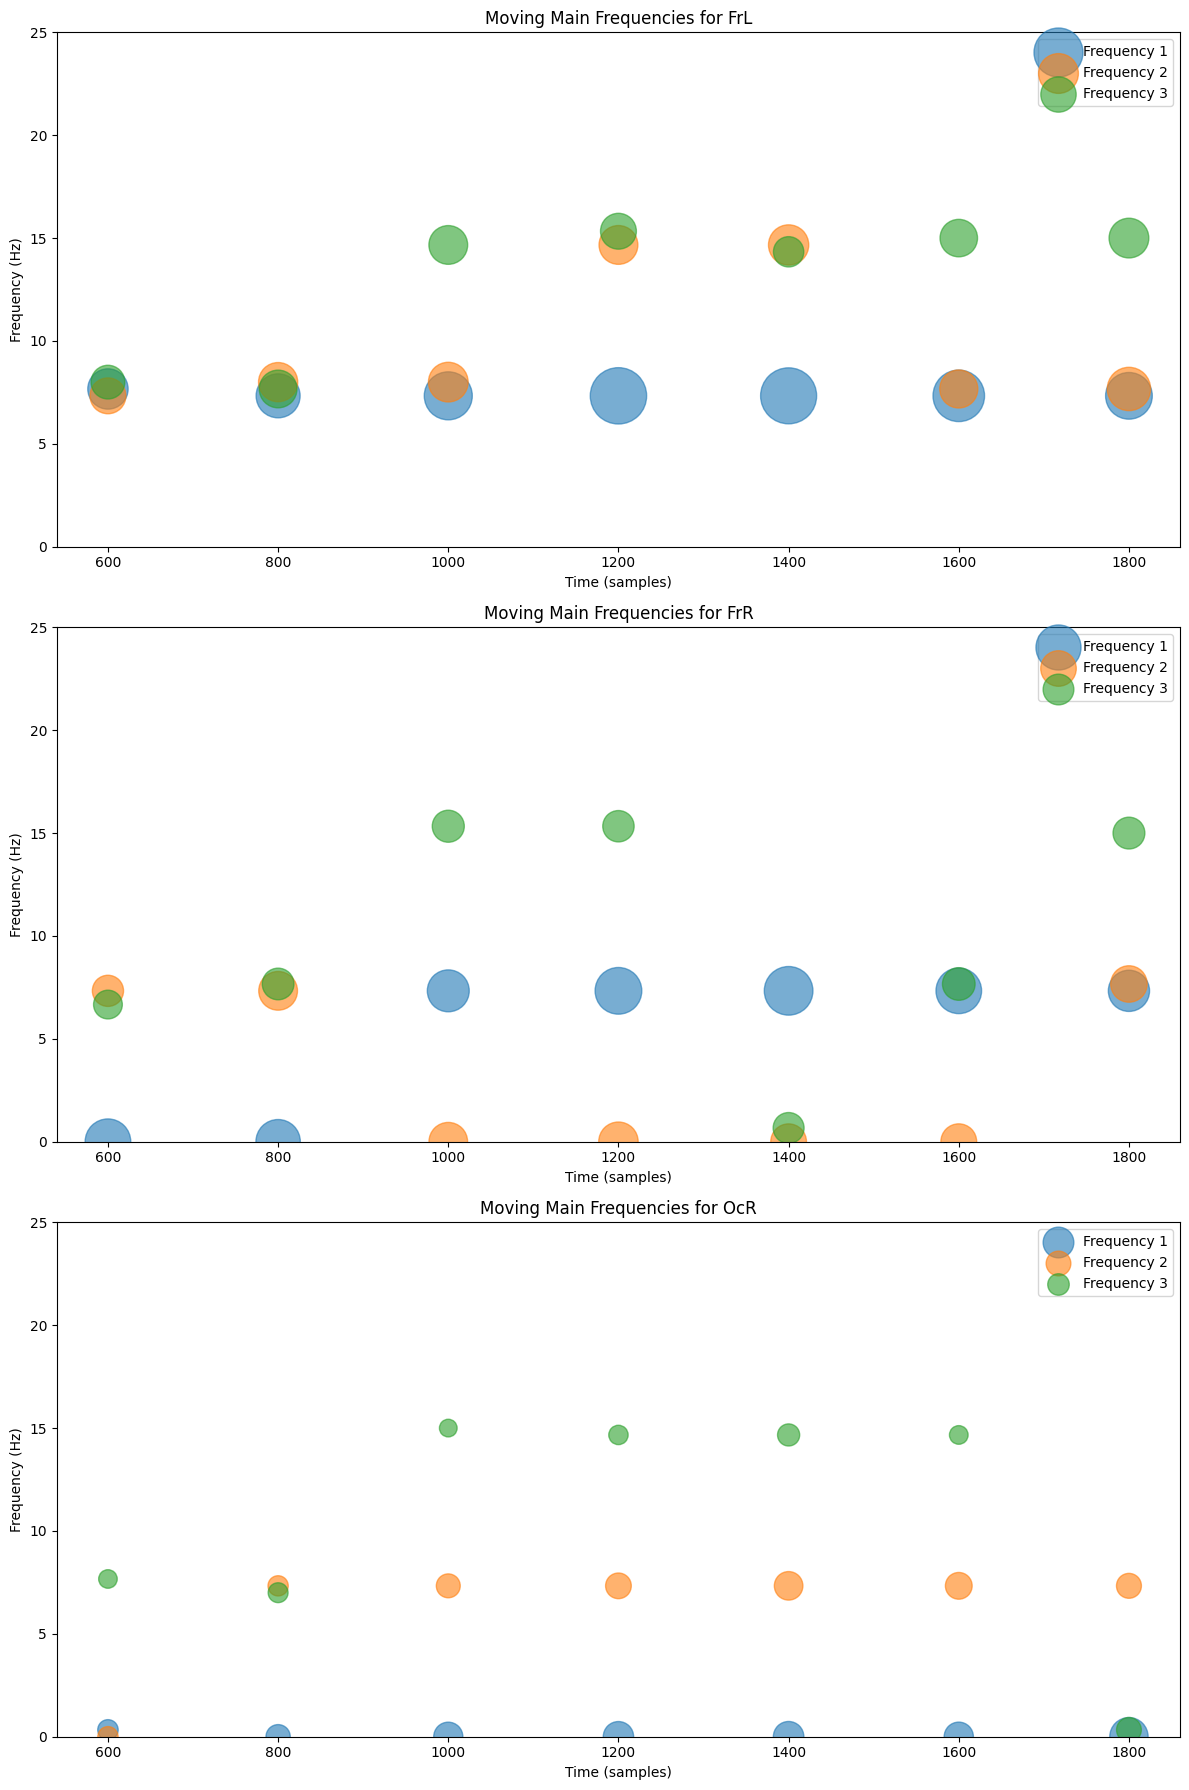

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies_and_amplitudes(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies and their amplitudes over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list of lists with up to 3 main frequencies per window.
    - main_amplitudes: A list of lists with amplitudes of these main frequencies.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    main_amplitudes = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        # Store the main frequencies, amplitudes, and time point
        main_frequencies.append(top_frequencies)
        main_amplitudes.append(top_amplitudes)
        time_points.append(start + window_size / 2)

    return main_frequencies, main_amplitudes, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 1000  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": swd[0]["FrL"],
    "FrR": swd[0]["FrR"],
    "OcR": swd[0]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies and amplitudes
    main_frequencies, main_amplitudes, time_points = find_main_frequencies_and_amplitudes(data, window_size, overlap, sample_rate)

    # Plot main frequencies with amplitude-dependent point sizes
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        amps = [amps[j] if j < len(amps) else 0 for amps in main_amplitudes]  # Use amplitude as point size

        # Scale amplitudes for display purposes (adjust scaling factor as needed)
        scaled_amps = np.array(amps) * 10

        # Scatter plot with frequency as y, time as x, and amplitude as size
        axs[i].scatter(time_points, freqs, s=scaled_amps, alpha=0.6, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()
    axs[i].set_ylim([0, 25])
plt.tight_layout()
plt.show()


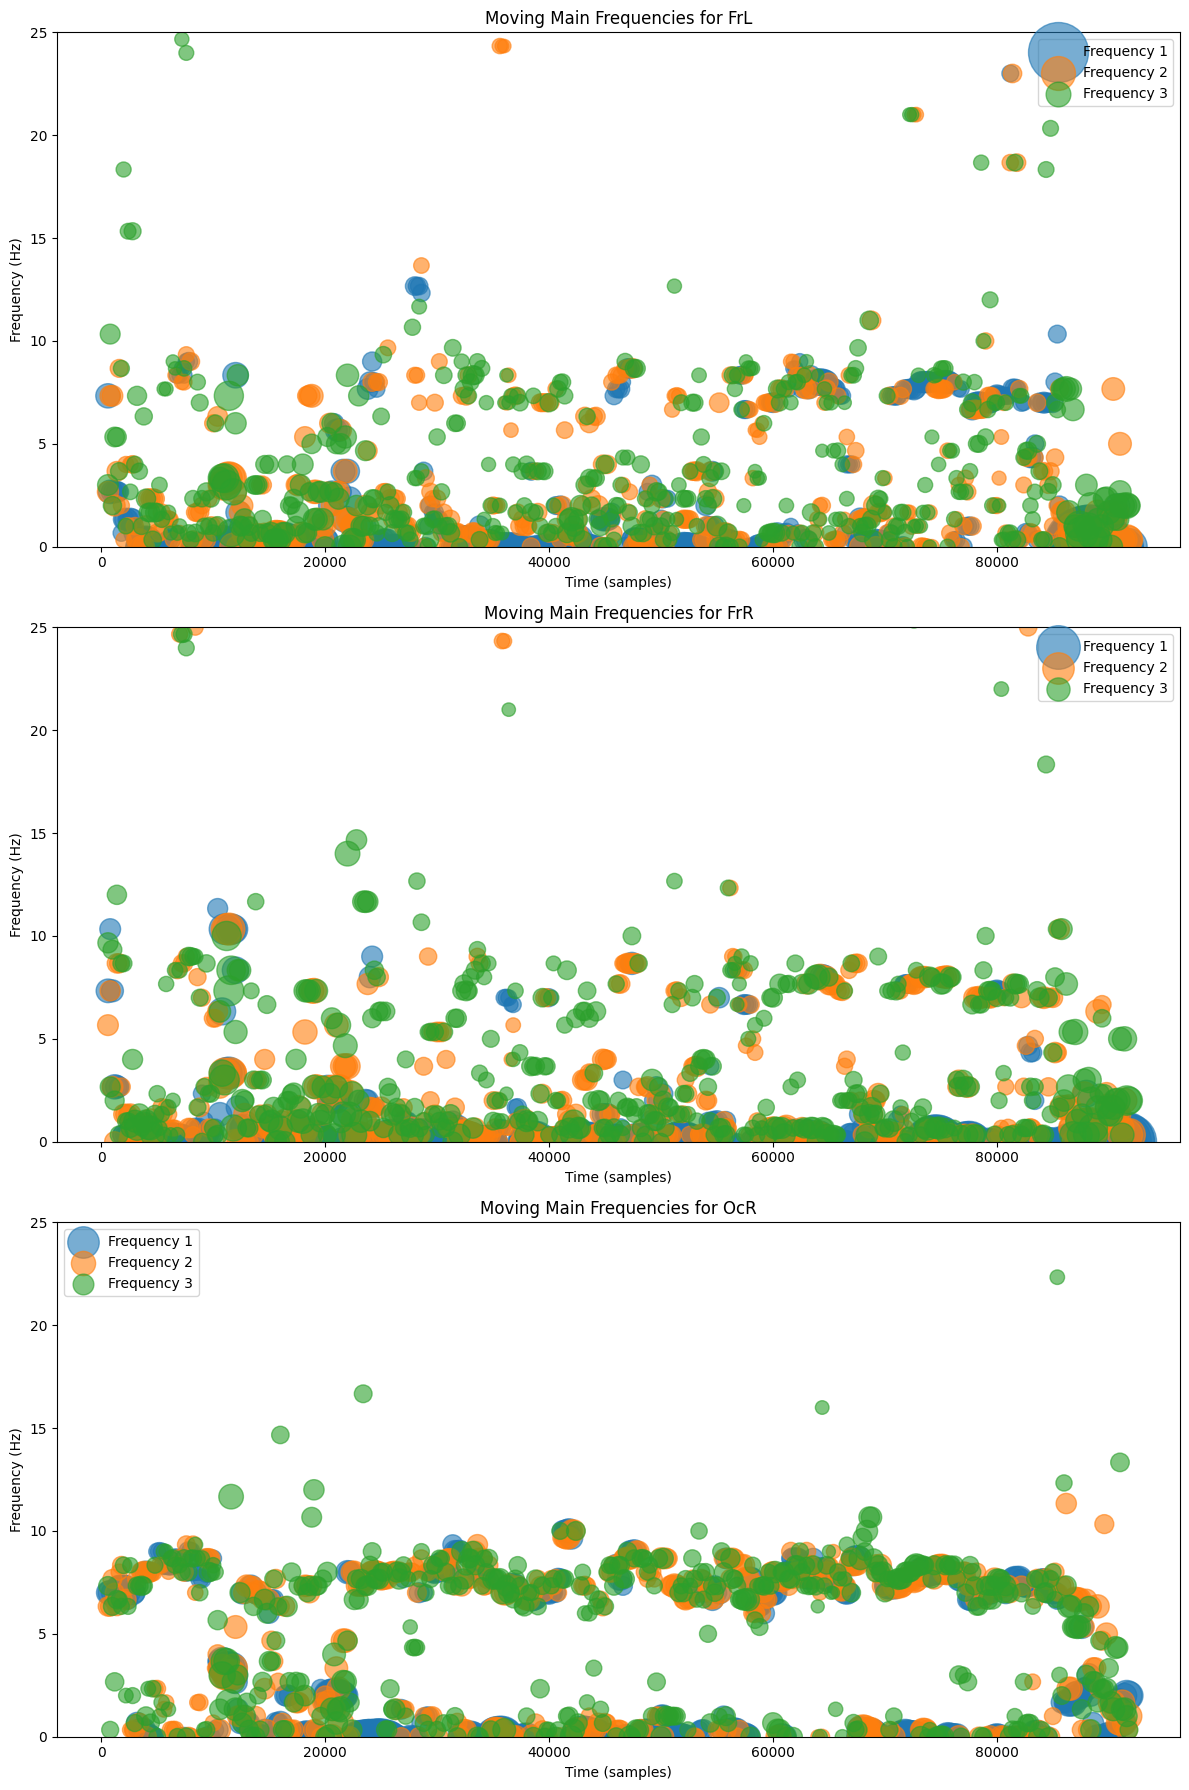

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def find_main_frequencies_and_amplitudes(array, window_size=1000, overlap=500, sample_rate=400):
    """
    Finds the main frequencies and their amplitudes over sliding windows.

    Parameters:
    - array: The input 1D array (time series data).
    - window_size: The number of samples per window.
    - overlap: The number of samples to overlap between windows.
    - sample_rate: Sampling rate of the signal in Hz.

    Returns:
    - main_frequencies: A list of lists with up to 3 main frequencies per window.
    - main_amplitudes: A list of lists with amplitudes of these main frequencies.
    - time_points: List of time points for each window's center.
    """
    main_frequencies = []
    main_amplitudes = []
    time_points = []

    # Sliding window loop
    for start in range(0, len(array) - window_size, window_size - overlap):
        window_data = array[start:start + window_size]

        # Apply FFT to the windowed data
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]  # Take positive frequencies
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get indices of the three largest magnitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        # Store the main frequencies, amplitudes, and time point
        main_frequencies.append(top_frequencies)
        main_amplitudes.append(top_amplitudes)
        time_points.append(start + window_size / 2)

    return main_frequencies, main_amplitudes, time_points

# Example usage for the three arrays
sample_rate = 400  # Hz
window_size = 1200  # Length of each window
overlap = 1000  # Overlap between windows

# Assuming you have data in iss[0]["FrL"], iss[0]["FrR"], and iss[0]["OcR"]
arrays = {
    "FrL": empty[25]["FrL"],
    "FrR": empty[25]["FrR"],
    "OcR": empty[25]["OcR"]
}

# Create subplots for each array
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (name, data) in enumerate(arrays.items()):
    # Calculate main frequencies and amplitudes
    main_frequencies, main_amplitudes, time_points = find_main_frequencies_and_amplitudes(data, window_size, overlap, sample_rate)

    # Plot main frequencies with amplitude-dependent point sizes
    for j in range(3):  # Top 3 frequencies
        freqs = [freqs[j] if j < len(freqs) else np.nan for freqs in main_frequencies]
        amps = [amps[j] if j < len(amps) else 0 for amps in main_amplitudes]  # Use amplitude as point size

        # Scale amplitudes for display purposes (adjust scaling factor as needed)
        scaled_amps = np.array(amps) * 10

        # Scatter plot with frequency as y, time as x, and amplitude as size
        axs[i].scatter(time_points, freqs, s=scaled_amps, alpha=0.6, label=f"Frequency {j+1}")

    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(f'Moving Main Frequencies for {name}')
    axs[i].legend()
    axs[i].set_ylim([0, 25])
plt.tight_layout()
plt.show()


## Train model on array of windowed main frequencies

In [ ]:
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fft import fft, fftfreq

# Assuming iss, ds, swd, empty are your class arrays of episodes with keys "FrL", "FrR", and "OcR"
classes = {
    'iss': iss,
    'ds': ds,
    'swd': swd,
    'empty': empty
}

# Define parameters for FFT feature extraction
sample_rate = 400  # Hz
window_size = 800  # Samples
overlap = 600  # Samples

def extract_main_frequencies(array, window_size=1200, overlap=600, sample_rate=400):
    """
    Extracts summary statistics (mean and max) of the main frequencies and amplitudes from a signal using sliding windows.
    """
    main_frequencies = []
    main_amplitudes = []

    # Iterate over windows
    for start in range(0, len(array) - window_size + 1, window_size - overlap):
        window_data = array[start:start + window_size]

        # Skip if window_data is empty or has fewer samples than window_size
        if len(window_data) == 0 or len(window_data) < window_size:
            continue

        # FFT to get frequency components
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Select up to 3 main frequencies
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        # Store frequencies and amplitudes
        main_frequencies.extend(top_frequencies)
        main_amplitudes.extend(top_amplitudes)

    # Check if any frequencies and amplitudes were found; if not, add default values
    if not main_frequencies or not main_amplitudes:
        return [0, 0, 0, 0]  # Fallback values if no frequencies were found

    # Calculate aggregate statistics for the windowed frequencies and amplitudes
    return [
        np.mean(main_frequencies), np.max(main_frequencies),
        np.mean(main_amplitudes), np.max(main_amplitudes)
    ]


# Prepare data and labels
X = []
y = []

# Sample 50 random episodes per class, ensuring lengths between 400 and 16000
for label, episodes in classes.items():
    filtered_episodes = [
        ep for ep in episodes if 400 < len(ep["FrL"]) < 327000
    ]
    selected_episodes = random.sample(filtered_episodes, 50)  # Select 50 episodes per class

    for episode in selected_episodes:
        # Extract features for each wave (FrL, FrR, OcR)
        features = []
        for wave in ["FrL", "FrR", "OcR"]:
            wave_features = extract_main_frequencies(episode[wave], window_size, overlap, sample_rate)
            features.extend(wave_features)

        X.append(features)
        y.append(label)

# Convert labels to integers for classification
label_map = {label: idx for idx, label in enumerate(classes.keys())}
y = np.array([label_map[label] for label in y])
X = np.array(X)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7250


In [ ]:
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fft import fft, fftfreq

# Parameters
sample_rate = 400  # Hz
window_size = 1200  # Samples for FFT window
overlap = 600  # Overlap for FFT window
segment_length = 2400  # Length of each new segment created from episodes

# Step 1: Define a function to split episodes into segments
def split_episodes_into_segments(episodes, segment_length=2400):
    segmented_episodes = []
    for episode in episodes:
        # Check that each wave has enough length to create segments
        min_length = min(len(episode["FrL"]), len(episode["FrR"]), len(episode["OcR"]))
        for start in range(0, min_length - segment_length + 1, segment_length):
            segment = {
                "FrL": episode["FrL"][start:start + segment_length],
                "FrR": episode["FrR"][start:start + segment_length],
                "OcR": episode["OcR"][start:start + segment_length]
            }
            segmented_episodes.append(segment)
    return segmented_episodes

# Step 2: Extract the main 3 frequencies and their amplitudes
def extract_main_frequencies(array, window_size=1200, overlap=600, sample_rate=400):
    main_frequencies = []
    main_amplitudes = []

    for start in range(0, len(array) - window_size + 1, window_size - overlap):
        window_data = array[start:start + window_size]

        # Skip if the window is empty or shorter than expected
        if len(window_data) < window_size:
            continue

        # Perform FFT
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get the top 3 frequencies and their amplitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        main_frequencies.extend(top_frequencies)
        main_amplitudes.extend(top_amplitudes)

    # Return the main 3 frequencies and their amplitudes as features
    if len(main_frequencies) >= 3 and len(main_amplitudes) >= 3:
        return main_frequencies[:3] + main_amplitudes[:3]
    else:
        # Return zeros if less than 3 frequencies were found
        return [0, 0, 0, 0, 0, 0]

# Step 3: Prepare data
X = []
y = []

# Assuming 'iss', 'ds', 'swd', 'empty' are defined with episodes
classes = {
    'iss': split_episodes_into_segments(iss, segment_length),
    'ds': split_episodes_into_segments(ds, segment_length),
    'swd': split_episodes_into_segments(swd, segment_length),
    'empty': split_episodes_into_segments(empty, segment_length)
}
print(f"Is len:{len(classes['iss'])}, Ds len:{len(classes['ds'])}, Swd len:{len(classes['swd'])},Empty len:{len(classes['empty'])},")

# Sample up to 50 random segments per class
for label, episodes in classes.items():
    selected_episodes = random.sample(episodes, min(100, len(episodes)))  # Cap at 50 segments per class

    for episode in selected_episodes:
        features = []
        for wave in ["FrL", "FrR", "OcR"]:
            wave_features = extract_main_frequencies(episode[wave], window_size, overlap, sample_rate)
            features.extend(wave_features)

        X.append(features)
        y.append(label)

# Convert labels to integers for classification
label_map = {label: idx for idx, label in enumerate(classes.keys())}
y = np.array([label_map[label] for label in y])
X = np.array(X)

# Step 4: Train a RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Is len:33, Ds len:525, Swd len:63,Empty len:8787,
Accuracy: 0.8833


In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Parameters
sample_rate = 400  # Hz
window_size = 1200  # Samples for FFT window
overlap = 600  # Overlap for FFT window
segment_length = 2400  # Length of each new segment created from episodes

# Step 1: Define a function to split episodes into segments
def split_episodes_into_segments(episodes, segment_length=2400):
    segmented_episodes = []
    for episode in episodes:
        # Check that each wave has enough length to create segments
        min_length = min(len(episode["FrL"]), len(episode["FrR"]), len(episode["OcR"]))
        for start in range(0, min_length - segment_length + 1, segment_length):
            segment = {
                "FrL": episode["FrL"][start:start + segment_length],
                "FrR": episode["FrR"][start:start + segment_length],
                "OcR": episode["OcR"][start:start + segment_length]
            }
            segmented_episodes.append(segment)
    return segmented_episodes

# Step 2: Extract the main 3 frequencies and their amplitudes
def extract_main_frequencies(array, window_size=1200, overlap=600, sample_rate=400):
    main_frequencies = []
    main_amplitudes = []

    for start in range(0, len(array) - window_size + 1, window_size - overlap):
        window_data = array[start:start + window_size]

        # Skip if the window is empty or shorter than expected
        if len(window_data) < window_size:
            continue

        # Perform FFT
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get the top 3 frequencies and their amplitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        main_frequencies.extend(top_frequencies)
        main_amplitudes.extend(top_amplitudes)

    # Return the main 3 frequencies and their amplitudes as features
    if len(main_frequencies) >= 3 and len(main_amplitudes) >= 3:
        return main_frequencies[:3] + main_amplitudes[:3]
    else:
        # Return zeros if less than 3 frequencies were found
        return [0, 0, 0, 0, 0, 0]

# Step 3: Prepare data
X = []
y = []

# Assuming 'iss', 'ds', 'swd', 'empty' are defined with episodes
classes = {
    'iss': split_episodes_into_segments(iss, segment_length),
    'ds': split_episodes_into_segments(ds, segment_length),
    'swd': split_episodes_into_segments(swd, segment_length),
    'empty': split_episodes_into_segments(empty, segment_length)
}
print(f"Is len:{len(classes['iss'])}, Ds len:{len(classes['ds'])}, Swd len:{len(classes['swd'])},Empty len:{len(classes['empty'])},")

# Sample up to 50 random segments per class
for label, episodes in classes.items():
    selected_episodes = random.sample(episodes, min(100, len(episodes)))  # Cap at 50 segments per class

    for episode in selected_episodes:
        features = []
        for wave in ["FrL", "FrR", "OcR"]:
            wave_features = extract_main_frequencies(episode[wave], window_size, overlap, sample_rate)
            features.extend(wave_features)

        X.append(features)
        y.append(label)

# Convert labels to integers for classification
label_map = {label: idx for idx, label in enumerate(classes.keys())}
y = np.array([label_map[label] for label in y])
X = np.array(X)

# Convert to numpy arrays
X = np.array(X)
#y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

# Fit and evaluate the models using LazyPredict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Is len:33, Ds len:525, Swd len:63,Empty len:8787,


 97%|█████████▋| 30/31 [00:07<00:00,  3.12it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 18
[LightGBM] [Info] Start training from score -2.205735
[LightGBM] [Info] Start training from score -1.069383
[LightGBM] [Info] Start training from score -1.592631
[LightGBM] [Info] Start training from score -1.069383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

100%|██████████| 31/31 [00:08<00:00,  3.75it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.92               0.91    None      0.92   
ExtraTreesClassifier               0.92               0.91    None      0.92   
SVC                                0.90               0.90    None      0.90   
RandomForestClassifier             0.90               0.90    None      0.90   
KNeighborsClassifier               0.87               0.87    None      0.87   
LGBMClassifier                     0.85               0.86    None      0.85   
LogisticRegression                 0.87               0.85    None      0.86   
GaussianNB                         0.83               0.85    None      0.83   
XGBClassifier                      0.83               0.84    None      0.83   
LinearSVC                          0.88               0.84    None      0.88   
AdaBoostClassifier                 0.82 

In [ ]:
import numpy as np
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fft import fft, fftfreq

# Parameters
sample_rate = 400  # Hz
window_size = 800  # Samples for FFT window
overlap = 600  # Overlap for FFT window
segment_length = 2400  # Length of each new segment created from episodes

# Step 1: Define a function to split episodes into segments
def split_episodes_into_segments(episodes, segment_length=2400):
    segmented_episodes = []
    for episode in episodes:
        # Check that each wave has enough length to create segments
        min_length = min(len(episode["FrL"]), len(episode["FrR"]), len(episode["OcR"]))
        for start in range(0, min_length - segment_length + 1, segment_length):
            segment = {
                "FrL": episode["FrL"][start:start + segment_length],
                "FrR": episode["FrR"][start:start + segment_length],
                "OcR": episode["OcR"][start:start + segment_length]
            }
            segmented_episodes.append(segment)
    return segmented_episodes

# Step 2: Extract the main 3 frequencies and their amplitudes
def extract_main_frequencies(array, window_size=1200, overlap=600, sample_rate=400):
    main_frequencies = []
    main_amplitudes = []

    for start in range(0, len(array) - window_size + 1, window_size - overlap):
        window_data = array[start:start + window_size]

        # Skip if the window is empty or shorter than expected
        if len(window_data) < window_size:
            continue

        # Perform FFT
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get the top 3 frequencies and their amplitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        main_frequencies.extend(top_frequencies)
        main_amplitudes.extend(top_amplitudes)

    # Return the main 3 frequencies and their amplitudes as features
    if len(main_frequencies) >= 3 and len(main_amplitudes) >= 3:
        return main_frequencies[:3] + main_amplitudes[:3]
    else:
        # Return zeros if less than 3 frequencies were found
        return [0, 0, 0, 0, 0, 0]

# Step 3: Prepare data
X = []
y = []

# Assuming 'iss', 'ds', 'swd', 'empty' are defined with episodes
classes = {
    'iss': split_episodes_into_segments(iss, segment_length),
    'ds': split_episodes_into_segments(ds, segment_length),
    'swd': split_episodes_into_segments(swd, segment_length),
    'empty': split_episodes_into_segments(empty, segment_length)
}

# Sample up to 50 random segments per class
for label, episodes in classes.items():
    selected_episodes = random.sample(episodes, min(100, len(episodes)))  # Cap at 50 segments per class

    for episode in selected_episodes:
        features = []
        for wave in ["FrL", "FrR", "OcR"]:
            wave_features = extract_main_frequencies(episode[wave], window_size, overlap, sample_rate)
            features.extend(wave_features)

        X.append(features)
        y.append(label)

# Convert labels to integers for classification
label_map = {label: idx for idx, label in enumerate(classes.keys())}
y = np.array([label_map[label] for label in y])
X = np.array(X)

# Step 4: Train a LinearDiscriminantAnalysis classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8500


# Вывод

In [ ]:
from pyedflib import highlevel
signals_fl, signal_headers_fl, header_fl = highlevel.read_edf("/content/drive/MyDrive/Brain/Hachaton/train_dataset_minzdrav_train/ECoG_golden_standard_[15 files, 6 h each]/Ati4y2_11m_BL_6h_edited.edf")
print(signals_fl)
print(signal_headers_fl)
print( header_fl)

[[0.1573125 0.1386875 0.1263125 ... 0.        0.        0.       ]
 [0.06275   0.037375  0.0260625 ... 0.        0.        0.       ]
 [0.01925   0.02475   0.0265625 ... 0.        0.        0.       ]]
[{'label': 'FrL', 'dimension': 'mV', 'sample_rate': 400.0, 'sample_frequency': 400.0, 'physical_max': 2.0, 'physical_min': -2.0, 'digital_max': 32000, 'digital_min': -32000, 'prefilter': '', 'transducer': ''}, {'label': 'FrR', 'dimension': 'mV', 'sample_rate': 400.0, 'sample_frequency': 400.0, 'physical_max': 2.0, 'physical_min': -2.0, 'digital_max': 32000, 'digital_min': -32000, 'prefilter': '', 'transducer': ''}, {'label': 'OcR', 'dimension': 'mV', 'sample_rate': 400.0, 'sample_frequency': 400.0, 'physical_max': 2.0, 'physical_min': -2.0, 'digital_max': 32000, 'digital_min': -32000, 'prefilter': '', 'transducer': ''}]
{'technician': '', 'recording_additional': '', 'patientname': 'X', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'sex': '', 'startdate': 

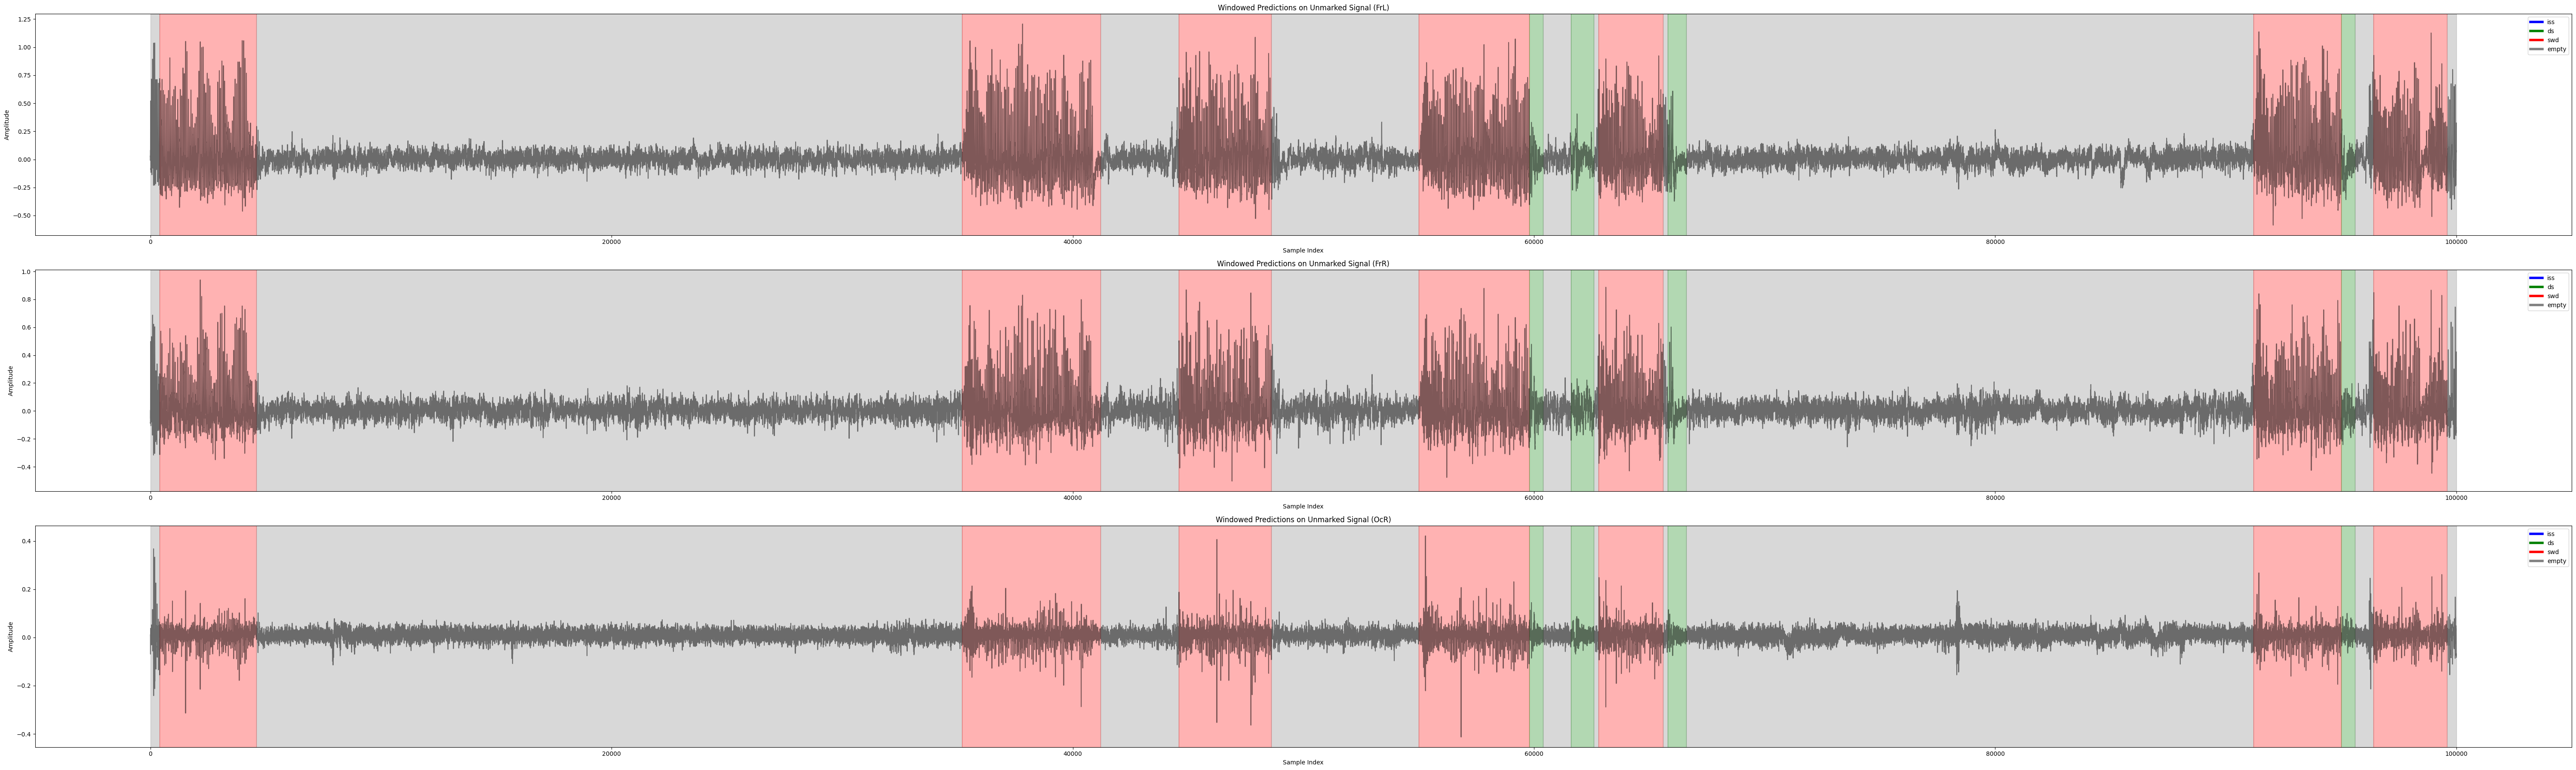

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.fft import fft, fftfreq

# Define the feature extraction function
def extract_main_frequencies(array, window_size=800, overlap=200, sample_rate=400):
    """
    Extracts the top 3 frequencies and their amplitudes from a signal using sliding windows.

    Parameters:
    - array (np.array): 1D array of signal data.
    - window_size (int): Number of samples per window.
    - overlap (int): Number of samples to overlap between windows.
    - sample_rate (int): Sampling rate in Hz.

    Returns:
    - List of top 3 frequencies and their amplitudes.
    """
    main_frequencies = []
    main_amplitudes = []

    step_size = window_size - overlap
    for start in range(0, len(array) - window_size + 1, step_size):
        window_data = array[start:start + window_size]

        # Perform FFT
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get the top 3 frequencies and their amplitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        main_frequencies.extend(top_frequencies)
        main_amplitudes.extend(top_amplitudes)

    # Ensure that we have at least 3 frequencies and amplitudes
    if len(main_frequencies) >= 3 and len(main_amplitudes) >= 3:
        return main_frequencies[:3] + main_amplitudes[:3]
    else:
        # Return zeros if less than 3 frequencies were found
        return [0, 0, 0, 0, 0, 0]

# Example: Preparing the unmarked signal
# Replace 'signals_fl' with your actual signal data
# Assuming 'signals_fl' is a list or array with three elements corresponding to "FrL", "FrR", "OcR"
unmarked_signal = {
    "FrL": signals_fl[0][624000:724000],
    "FrR": signals_fl[1][624000:724000],
    "OcR": signals_fl[2][624000:724000]
}  # Your unmarked signal data

# Parameters for sliding window predictions
window_size = 1000
step_size = 200
sample_rate = 400  # Hz

# Color mapping for each class
class_colors = {0: 'blue', 1: 'green', 2: 'red', 3: 'grey'}
class_names = {0: 'iss', 1: 'ds', 2: 'swd', 3: 'empty'}

# Initialize a 2D array to store class counts for each sample
num_classes = len(class_colors)
signal_length = len(unmarked_signal["FrL"])
class_counts = np.zeros((num_classes, signal_length), dtype=int)

# Iterate through the signal in sliding windows
for start in range(0, signal_length - window_size + 1, step_size):
    end = start + window_size

    # Extract main frequencies and format as input features for the model
    features = []
    for wave in ["FrL", "FrR", "OcR"]:
        wave_data = unmarked_signal[wave][start:end]
        wave_features = extract_main_frequencies(wave_data, window_size=window_size, overlap=overlap, sample_rate=sample_rate)
        features.extend(wave_features)
    features = np.array(features).reshape(1, -1)  # Reshape for prediction

    # Make prediction for this window
    window_pred = model.predict(features)[0]

    # Increment class count for each sample in the window
    class_counts[window_pred, start:end] += 1

# Assign colors based on counts (at least 2 predictions)
assigned_colors = np.full(signal_length, 'grey', dtype=object)

for idx in range(signal_length):
    # Find classes with at least 2 predictions for this sample
    eligible_classes = [cls for cls in range(num_classes) if class_counts[cls, idx] >= 3]
    if eligible_classes:
        # Assign the class with the highest count
        cls_counts = [class_counts[cls, idx] for cls in eligible_classes]
        dominant_class = eligible_classes[np.argmax(cls_counts)]
        assigned_colors[idx] = class_colors[dominant_class]
    else:
        assigned_colors[idx] = 'grey'

# Plot the original signal with color-coded regions
fig, axs = plt.subplots(3, 1, figsize=(60, 18))

for i, (name, data) in enumerate(unmarked_signal.items()):
    axs[i].plot(data, color='black', alpha=0.5, label="Signal")

    # Overlay colored regions
    current_color = None
    start_idx = 0
    for idx in range(signal_length):
        color = assigned_colors[idx]
        if color != current_color:
            if current_color is not None:
                axs[i].axvspan(start_idx, idx, color=current_color, alpha=0.3)
            current_color = color
            start_idx = idx
    # Add the last span
    axs[i].axvspan(start_idx, signal_length, color=current_color, alpha=0.3)

    # Create custom legend
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in class_colors.values()]
    labels = [class_names[i] for i in class_colors.keys()]
    axs[i].legend(handles, labels, loc='upper right')

    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title(f"Windowed Predictions on Unmarked Signal ({name})")

plt.tight_layout()
plt.show()


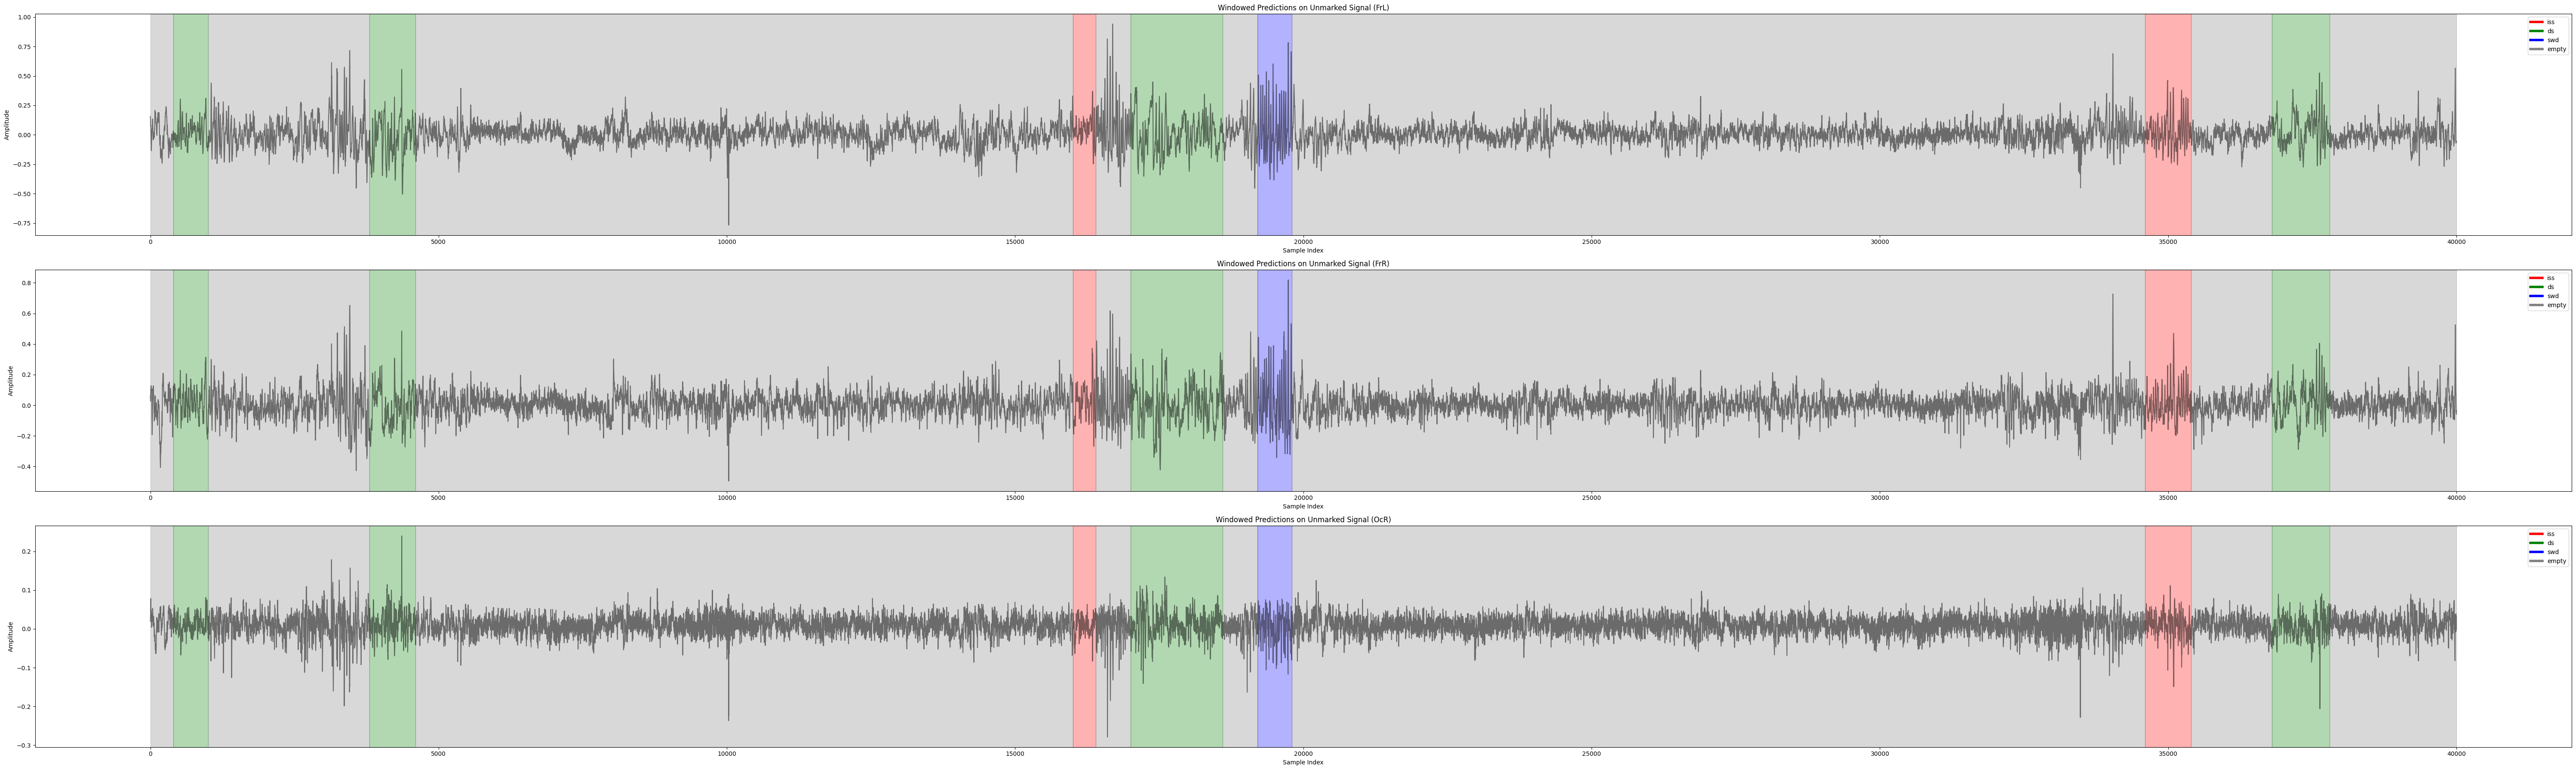

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.fft import fft, fftfreq

def extract_main_frequencies(array, window_size=1200, overlap=600, sample_rate=400):
    main_frequencies = []
    main_amplitudes = []

    for start in range(0, len(array) - window_size + 1, window_size - overlap):
        window_data = array[start:start + window_size]

        # Skip if the window is empty or shorter than expected
        if len(window_data) < window_size:
            continue

        # Perform FFT
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get the top 3 frequencies and their amplitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        main_frequencies.extend(top_frequencies)
        main_amplitudes.extend(top_amplitudes)

    if len(main_frequencies) >= 3 and len(main_amplitudes) >= 3:
        return main_frequencies[:3] + main_amplitudes[:3]
    else:
        return [0, 0, 0, 0, 0, 0]

# Placeholder for unmarked signal data and parameters
unmarked_signal = {
    "FrL": signals_fl[0][:40000],
    "FrR": signals_fl[1][:40000],
    "OcR": signals_fl[2][:40000]
}
window_size = 800
step_size = 200
sample_rate = 400

# Color and class mappings
class_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'grey'}
class_names = {0: 'iss', 1: 'ds', 2: 'swd', 3: 'empty'}
threshold = 0.5  # Threshold for prediction confidence

# Initialize array to store color-coded class regions for visualization
signal_length = len(unmarked_signal["FrL"])
colors = np.array(['grey'] * signal_length, dtype=object)
class_counts = np.zeros((num_classes, signal_length), dtype=int)

# Iterate through the signal in sliding windows
for start in range(0, signal_length - window_size, step_size):
    end = start + window_size

    # Extract main frequencies and format as input features for the model
    features = []
    for wave in unmarked_signal.values():
        wave_features = extract_main_frequencies(wave[start:end], window_size=window_size, sample_rate=sample_rate)
        features.extend(wave_features)
    features = np.array(features).reshape(1, -1)

    # Get prediction probabilities for this window
    probabilities = model.predict_proba(features)[0]
    max_prob = np.max(probabilities)
    pred_class = np.argmax(probabilities)
    # Increment class count for each sample in the window
    # class_counts[window_pred, start:end] += 1

    # Apply the threshold to determine if the prediction is valid
    if max_prob > threshold:
        class_counts[pred_class, start:end] += 1
        # window_color = class_colors[pred_class]
    else:
        class_counts[3, start:end] += 1

# Plot the results
for idx in range(signal_length):
    # Find classes with at least 3 predictions for this sample
    eligible_classes = [cls for cls in range(num_classes) if class_counts[cls, idx] >= 3]
    if eligible_classes:
        # Assign the class with the highest count
        cls_counts = [class_counts[cls, idx] for cls in eligible_classes]
        dominant_class = eligible_classes[np.argmax(cls_counts)]
        assigned_colors[idx] = class_colors[dominant_class]
    else:
        assigned_colors[idx] = 'grey'

# Plot the original signal with color-coded regions
fig, axs = plt.subplots(3, 1, figsize=(60, 18))

for i, (name, data) in enumerate(unmarked_signal.items()):
    axs[i].plot(data, color='black', alpha=0.5, label="Signal")

    # Overlay colored regions
    current_color = None
    start_idx = 0
    for idx in range(signal_length):
        color = assigned_colors[idx]
        if color != current_color:
            if current_color is not None:
                axs[i].axvspan(start_idx, idx, color=current_color, alpha=0.3)
            current_color = color
            start_idx = idx
    # Add the last span
    axs[i].axvspan(start_idx, signal_length, color=current_color, alpha=0.3)

    # Create custom legend
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in class_colors.values()]
    labels = [class_names[i] for i in class_colors.keys()]
    axs[i].legend(handles, labels, loc='upper right')

    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title(f"Windowed Predictions on Unmarked Signal ({name})")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy.fft import fft, fftfreq

# Define extract_main_frequencies function
def extract_main_frequencies(array, window_size=1200, overlap=600, sample_rate=400):
    main_frequencies = []
    main_amplitudes = []

    for start in range(0, len(array) - window_size + 1, window_size - overlap):
        window_data = array[start:start + window_size]

        # Skip if the window is empty or shorter than expected
        if len(window_data) < window_size:
            continue

        # Perform FFT
        fft_values = fft(window_data)
        fft_magnitudes = np.abs(fft_values)[:window_size // 2]
        fft_freqs = fftfreq(window_size, d=1/sample_rate)[:window_size // 2]

        # Get the top 3 frequencies and their amplitudes
        top_indices = np.argsort(fft_magnitudes)[-3:][::-1]
        top_frequencies = fft_freqs[top_indices]
        top_amplitudes = fft_magnitudes[top_indices]

        main_frequencies.extend(top_frequencies)
        main_amplitudes.extend(top_amplitudes)

    # Return the main 3 frequencies and their amplitudes as features
    if len(main_frequencies) >= 3 and len(main_amplitudes) >= 3:
        return main_frequencies[:3] + main_amplitudes[:3]
    else:
        # Return zeros if less than 3 frequencies were found
        return [0, 0, 0, 0, 0, 0]

# Assume unmarked_signal is your new, unmarked signal array
unmarked_signal = {
    "FrL": signals_fl[0][:12000],
    "FrR": signals_fl[1][:12000],
    "OcR": signals_fl[2][:12000]
}

# Parameters for sliding window predictions
window_size = 800
step_size = 200
sample_rate = 400  # Adjust as needed

# Color mapping for each class
class_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'grey'}
class_names = {0: 'iss', 1: 'ds', 2: 'swd', 3: 'empty'}

# Initialize array to store color-coded class regions for visualization
signal_length = len(unmarked_signal["FrL"])
colors = np.array(['grey'] * signal_length, dtype=object)  # Default to 'grey'

# Instantiate and train your model if not already done
# model = LinearDiscriminantAnalysis()
# Ensure `model` is trained here before proceeding

# Iterate through the signal in sliding windows
for start in range(0, signal_length - window_size, step_size):
    end = start + window_size

    # Extract main frequencies and format as input features for the model
    features = []
    for wave in unmarked_signal.values():
        wave_features = extract_main_frequencies(wave[start:end], window_size=window_size, sample_rate=sample_rate)
        features.extend(wave_features)
    features = np.array(features).reshape(1, -1)  # Reshape for prediction

    # Make predictions for this window
    window_pred = model.predict(features)[0]

    # Color the window according to the predicted class
    colors[start:end] = class_colors[window_pred]

# Create subplots for each signal array
fig, axs = plt.subplots(3, 1, figsize=(20, 18))

for i, (name, data) in enumerate(unmarked_signal.items()):
    axs[i].plot(data, color='grey', alpha=0.5, label="Signal")

    # Color overlay based on predictions
    for start in range(0, signal_length - window_size, step_size):
        end = start + window_size
        axs[i].axvspan(start, end, color=colors[start], alpha=0.3)

    # Add legend and labels
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in class_colors.values()]
    labels = [class_names[idx] for idx in class_colors.keys()]
    axs[i].legend(handles, labels, loc='upper right')
    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title(f"Windowed Predictions on Unmarked Signal ({name})")

plt.tight_layout()
plt.show()
